#PROYECTO MLIP
ALUMNO: Manuel Juarez

Pasos sugeridos segun Cati:
1) Desglosar los videos en sus frames con algun programa
2) Aplicar algo que calcule "imagen por imagen" el nivel de gris
3) Aplicar un umbralizado global o un filtro de bordes
4) Red neuronal que los clasifique

Idea 1\
Pasos:\
1) Agarrar una imagen entera, hacer su df con antributos: numero de pixexl, coord x, coord y, valor de pixel\
2) Graficar mapa de densidad con un plano x-y y en la tercer dim el valor de la intesidad, es una forma bonita de ver el punto de inflexion \
3) En base a ese valor hacer el binarizado de la imagen (segmentacion)\
4) Con la imagen segmentada hacer los dataframes de las imagenes y asi obtener regiones labeleadas como contornos, todo en una 5ta columna que seria label "1" o "0" dependiendo si hay contorno o no.\
5) Hacer CNN, entrenamiento y validacion\

Idea 2\
Pasos:\
1) Agarrar una region de la imagen y la imagen entera \
2) Hacer sus histogramas y analizar valores, para poder extraer un valor de umbralizado\
3) En base a ese valor hacer el binarizado de la imagen (segmentacion)\
4) Con la imagen segmentada hacer los dataframes de las imagenes y asi obtener regiones labeleadas como contornos\
5) Hacer CNN, entrenamiento y validacion\



##ARMADO DE BDD,  GRAFICA DE IMAGENES Y ANALISIS EN BASE A HISTOGRAMAS CON SEGMENTACION

###LIBRERIAS, CONEXION A DRIVE Y ARMADO DE BDD

In [ ]:
import math
import numpy as np
import pandas as pd
import cv2
import os
from google.colab.patches import cv2_imshow #cv2.imshow no funciona en colab porque se rompe todo, hay que usar esta func para mostrar imagenes
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Las imagenes estan en una carptea que dice Fotos dentro de la unidad compartida.
from google.colab import drive #Hay que conectar el colab con nuestro google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ruta_bdd = "/content/drive/MyDrive/01_Proyecto_MLIP/Proyecto_final/Images"
BDD = []
BDD_RGB = []
print(len(BDD))
print(len(BDD_RGB))

0
0


In [ ]:
for carpeta in os.listdir(ruta_bdd):
  ruta_especifica = ruta_bdd + "/" + carpeta
  for imagen in os.listdir(ruta_especifica):
    img = cv2.imread(os.path.join(ruta_especifica, imagen))
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    BDD.append([img_gray])
print(np.shape(BDD))
print('dimensiones de una imagen: ', BDD[2][0].shape, 'es decir: ', BDD[2][0].shape[0]*BDD[2][0].shape[1], '=', BDD[2][0].shape[0],'x',BDD[2][0].shape[1],' pixeles RGB')
print('tipo de datos: ', BDD[2][0].dtype)


(700, 1)
dimensiones de una imagen:  (137, 137) es decir:  18769 = 137 x 137  pixeles RGB
tipo de datos:  uint8


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


In [ ]:
for carpeta in os.listdir(ruta_bdd):
  ruta_especifica = ruta_bdd + "/" + carpeta
  for imagen in os.listdir(ruta_especifica):
    img = cv2.imread(os.path.join(ruta_especifica, imagen))
    #img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    BDD_RGB.append([img])
print(np.shape(BDD_RGB))
print('dimensiones de una imagen: ', BDD_RGB[2][0].shape, 'es decir: ', BDD_RGB[2][0].shape[0]*BDD_RGB[2][0].shape[1], '=', BDD_RGB[2][0].shape[0],'x',BDD_RGB[2][0].shape[1],' pixeles RGB')
print('tipo de datos: ', BDD_RGB[2][0].dtype)

(700, 1)
dimensiones de una imagen:  (137, 137, 3) es decir:  18769 = 137 x 137  pixeles RGB
tipo de datos:  uint8


In [ ]:
print('dimensiones de una imagen: ', BDD[2][0].shape, BDD[330][0].shape, BDD[601][0].shape, 'es decir: ', BDD[2][0].shape[0]*BDD[2][0].shape[1], '=', BDD[2][0].shape[0],'x',BDD[2][0].shape[1],' pixeles RGB')
print('tipo de datos: ', BDD[2][0].dtype, BDD[330][0].dtype, BDD[601][0].dtype)

dimensiones de una imagen:  (137, 137) (512, 512) (181, 175) es decir:  18769 = 137 x 137  pixeles RGB
tipo de datos:  uint8 uint8 uint8


###GRAFICAMOS UNA IMAGEN EJEMPLO DE LA BDD

In [ ]:
print("El maximo de la imagen es:", np.max(BDD[2][0]),". El minimo de la imagen es: ", np.min(BDD[630][0]))
plt.figure(figsize=(20,20)) #Para graficar
plt.imshow(BDD[2][0], cmap = 'gray') #https://stackoverflow.com/questions/36431496/typeerror-invalid-dimensions-for-image-data-when-plotting-array-with-imshow
plt.colorbar() #Pone la barra de referencia de colores con pixeles al lado
plt.grid(True) #Hace una grilla sobre la imagen con True
plt.show() #Esconde un texto feo "<function matplotlib.pyplot.show(close=None, block=None)>"

El maximo de la imagen es: 94 . El minimo de la imagen es:  15


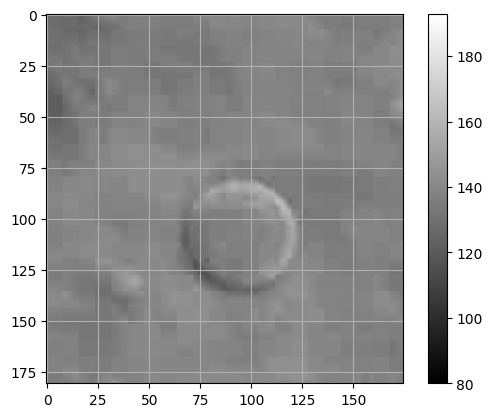

In [ ]:
print("El maximo de la imagen es:", np.max(BDD_RGB[2][0]),". El minimo de la imagen es: ", np.min(BDD_RGB[2][0]))
plt.figure() #Para graficar
plt.imshow(BDD_RGB[601][0],cmap='gray') #https://stackoverflow.com/questions/36431496/typeerror-invalid-dimensions-for-image-data-when-plotting-array-with-imshow
plt.colorbar() #Pone la barra de referencia de colores con pixeles al lado
plt.grid(True) #Hace una grilla sobre la imagen con True
plt.show() #Esconde un texto feo "<function matplotlib.pyplot.show(close=None, block=None)>"

###DECLARAMOS LA VARIABLE DE INTERES, ROIS, Y PLOTEAMOS LAS ROIS

dimensiones de la imagen:  (137, 137) es decir:  18769 = 137 x 137  pixeles RGB
tipo de datos:  uint8
El valor de la intensidad de un pixel cualquiera es:  59


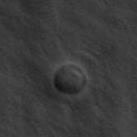

In [ ]:
#Pasamos la imagen gray a df
#Duda: Hay sutiles diferencias en cuanto al color? Podemos ver de armar nuevas columnas.
img_analisis= BDD[2][0] #Cuando hice la BDD use cv2.imread, ya la paso a GRAY
print('dimensiones de la imagen: ', img_analisis.shape, 'es decir: ', img_analisis.shape[0]*img_analisis.shape[1], '=', img_analisis.shape[0],'x',img_analisis.shape[1],' pixeles RGB')
print('tipo de datos: ', img_analisis.dtype)
print('El valor de la intensidad de un pixel cualquiera es: ', BDD[2][0][2,2]) #Para ver el valor del pixel en sus tres canales.
#Quiero revisar si en todos sus valores es el mismo valor de intensidad o hay sutiles diferencias para analizar.
cv2_imshow(img_analisis)

In [ ]:
#Vamos a probar hacer ROIs Y asi ponerle etiqueta al borde de la celula
roi1=(50, 69, 10, 20)#borde
roi2=(58, 88, 25, 7) #borde
roi3=(80, 69, 8, 20)#borde
roi4=(58, 61, 25, 8)#borde
roi5=(20, 20, 20, 40)#fondo
roi6=(100,80,35,30)#fondo
print('En cada ROI se guarda: (columna, fila, anchocol, anchofila)')
print(roi5)

rois=[roi1,roi2,roi3,roi4,roi5,roi6]

En cada ROI se guarda: (columna, fila, anchocol, anchofila)
(20, 20, 20, 40)


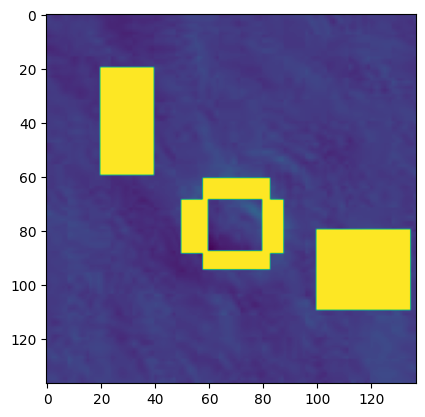

Zonas etiquetadas-> Amarillo: Bordes, Violeta: Fondo


In [ ]:
img_analisis_rois = img_analisis.copy()

for i in range(6):
  #ahora esta armando la "cajita" que tiene esquina en (columna,fila)
  roi=rois[i]
  f1=roi[1] #tomo la fila de la roi (fila de la esquina superior izquierda)
  ff=roi[1]+roi[3] #suma el lugar de fila+ancho de fila (fila de la esquina superior derecha)
  c1=roi[0] #tomo la columna de la roi (columna de la esquina superior izquierda)
  cf=roi[0]+roi[2] #tomo la columna de la roi (columna de la esquina superior derecha)
  img_analisis_rois[f1:ff,c1:cf]=255 #aca a la "cajita" del roi1 le da color rojo, a la "cajita" del roi2 le da color verde
  #a la "cajita" del roi3 le da color azul

plt.imshow(img_analisis_rois) #cmap='gray' para ver en gris
plt.show()
print('Zonas etiquetadas-> Amarillo: Bordes, Violeta: Fondo')

In [ ]:
img_analisis
img_fusionada_falso_rgb
img_analisis_rois
img_fusionada_con_rois
plt.figure(figsize=(10,10))
plt.subplot(221), plt.imshow(img_02, 'gray'),plt.title('imagen completa'), plt.axis('off')
plt.subplot(222), plt.imshow(img_330,'gray'),plt.title('máscara con lugares'), plt.axis('off')
plt.subplot(223), plt.imshow(img_601, 'gray'), plt.title('imagen en la máscara'), plt.axis('off')
plt.subplot(224), plt.plot(hist_full_1), plt.plot(hist_full_2), plt.plot(hist_full_3), plt.xlabel('Intensidad'),plt.ylabel("Cantidad píxeles"),plt.legend(['Imagen 02','Imagen 330','Imagen 601'])
plt.xlim([0,226])

plt.show()

###HISTOGRAMAS Y SEGMENTACION: BUSCAMOS MAS CARACTERISTICAS PARA LA IMAGEN

**Histogramas con Python: librerías numpy, cv2 o matplotlib**

numpy tiene una función para calcular el histograma, calcula el histograma de cualquier tipo de dato, parece que no es rápida

Con Open cv, está pensado para histograma de imágenes (Monocroma o RGB):

**cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])**

- Devuelve un vector
- El nombre de la imagen debe estar entre corchetes
- Channels indica para qué canal se pide el histograma. Puede ser 0, 1 o 2.
- Si la imagen es gris/monocroma se pone 0.
- Si el histograma es de la imagen completa se coloca como máscara None.
- Se puede pedir el histograma de una parte de la imagen, mediante una máscara.
- histsize indica la cantidad de bins. Si queremos contabilizar la frecuencia de todas las intensidades y tenemos 256 valores, colocamos 256 entre corchetes. Podemos agruparlos. Pedir por ejemplo 16 bins.
- ranges es el rango. En nuestro caso, normalmente es [0,256]


aqui info sobre los prametros usados: https://docs.opencv.org/3.4/d6/dc7/group__imgproc__hist.html#ga4b2b5fd75503ff9e6844cc4dcdaed35d


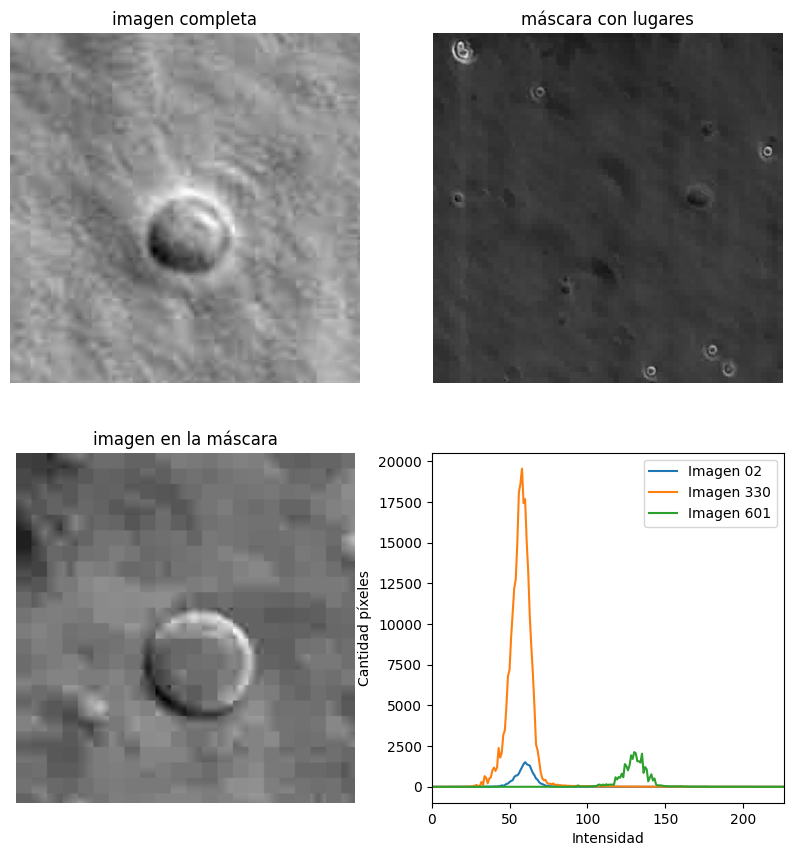

In [ ]:
img_02= BDD[2][0]
img_330=BDD[330][0]
img_601=BDD[601][0]
hist_full_1 = cv2.calcHist([img_02],[0],None,[256],[0,256])
hist_full_2 = cv2.calcHist([img_330],[0],None,[256],[0,256])
hist_full_3 = cv2.calcHist([img_601],[0],None,[256],[0,256])
plt.figure(figsize=(10,10))
plt.subplot(221), plt.imshow(img_02, 'gray'),plt.title('imagen completa'), plt.axis('off')
plt.subplot(222), plt.imshow(img_330,'gray'),plt.title('máscara con lugares'), plt.axis('off')
plt.subplot(223), plt.imshow(img_601, 'gray'), plt.title('imagen en la máscara'), plt.axis('off')
plt.subplot(224), plt.plot(hist_full_1), plt.plot(hist_full_2), plt.plot(hist_full_3), plt.xlabel('Intensidad'),plt.ylabel("Cantidad píxeles"),plt.legend(['Imagen 02','Imagen 330','Imagen 601'])
plt.xlim([0,226])

plt.show()

dimensiones de la imagen:  (137, 137) es decir:  23975 = 137 x 137  pixeles RGB
tipo de datos:  uint8


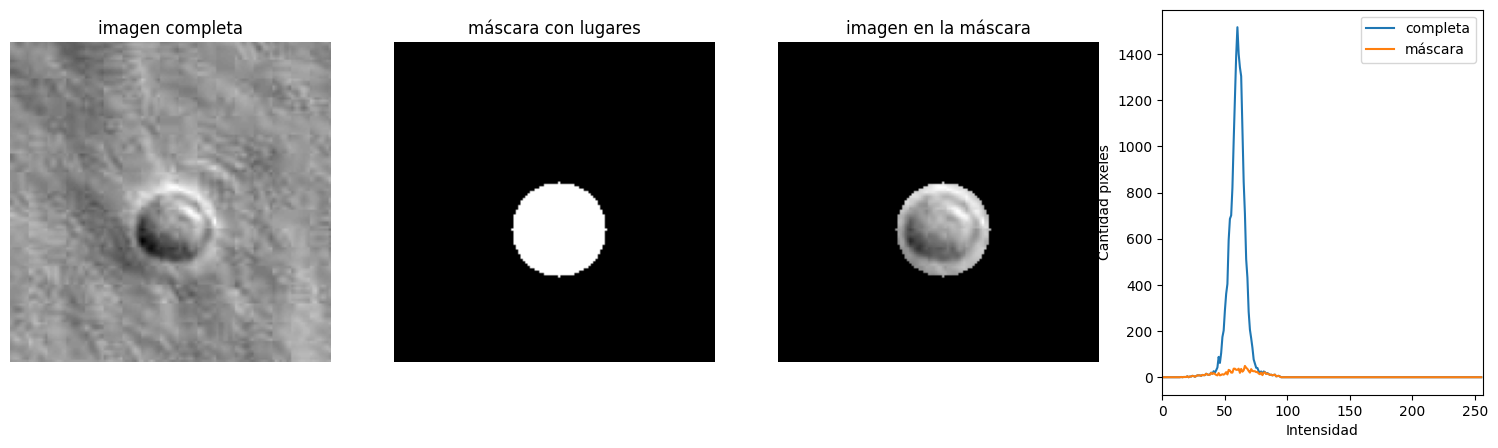

In [ ]:
#Se puede estudiar el histograma de una parte de la imagen
#print(BDD[2][0]) La imagen del indice 2 de la BDD tiene: en su posicion 0 tiene a la matriz de la img; y en la posicion 1 al tipo de imagen q trabja.
img2 = img_analisis.copy()
#Creamos una máscara circular para analizar la imagen a detalle en histograma
mask = np.zeros(img2.shape[:2], np.uint8)
mask = cv2.circle(mask,(70,80),20,(255),-1) #mask en forma de CIRCULO, parametros: matriz con dimensiones de la img, coord del centro, radio

masked_img=cv2.bitwise_and(img_analisis,mask) #Superponemos la mascara sobre la imagen.
#Argumentos: fuente, máscara
#bitwise_and operación and bit a bit y guarda el resultado

# Calculo de histograma con y sin mascara. El tercer argumento indica si va mascara (mascara 1s y 0s)o no (None)
hist_full = cv2.calcHist([img_analisis],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img_analisis],[0],mask,[256],[0,256])

print('dimensiones de la imagen: ', img_analisis.shape, 'es decir: ', img_analisis.shape[0]*img.shape[1], '=', img_analisis.shape[0],'x',img_analisis.shape[1],' pixeles RGB')
print('tipo de datos: ', img_analisis.dtype)

plt.figure(figsize=(19,5))
plt.subplot(141), plt.imshow(img_analisis, 'gray'),plt.title('imagen completa'), plt.axis('off')
plt.subplot(142), plt.imshow(mask,'gray'),plt.title('máscara con lugares'), plt.axis('off')
plt.subplot(143), plt.imshow(masked_img, 'gray'), plt.title('imagen en la máscara'), plt.axis('off')
plt.subplot(144), plt.plot(hist_full), plt.plot(hist_mask),plt.xlabel('Intensidad'),plt.ylabel("Cantidad píxeles"),plt.legend(['completa', 'máscara'])
plt.xlim([0,256])

plt.show()

**Conclusion: Los niveles de intesidad de gris de la imagen se superponen en su mayoria. Hay una pequeña region de pixeles en el histograma de img con mascara que indica tener intensidades con posibilidad de ser separadas por binarizado luego de un procesamiento de la misma.**

In [ ]:
#máscara/kernel Prewitt 3x3:
#Para Bordes Diagonales
PrewittD= np.array([[1, 1, 0], [1, 0, -1], [0, -1, -1]])
#Para bordes Verticales:
PrewittV= np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
#Para Bordes Horizontales
PrewittH= np.transpose(PrewittV)

print(PrewittD)
print(PrewittV)
print(PrewittH)
print('Notar que la suma de los coeficientes da: ', np.sum(PrewittD))

[[ 1  1  0]
 [ 1  0 -1]
 [ 0 -1 -1]]
[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]
[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]
Notar que la suma de los coeficientes da:  0


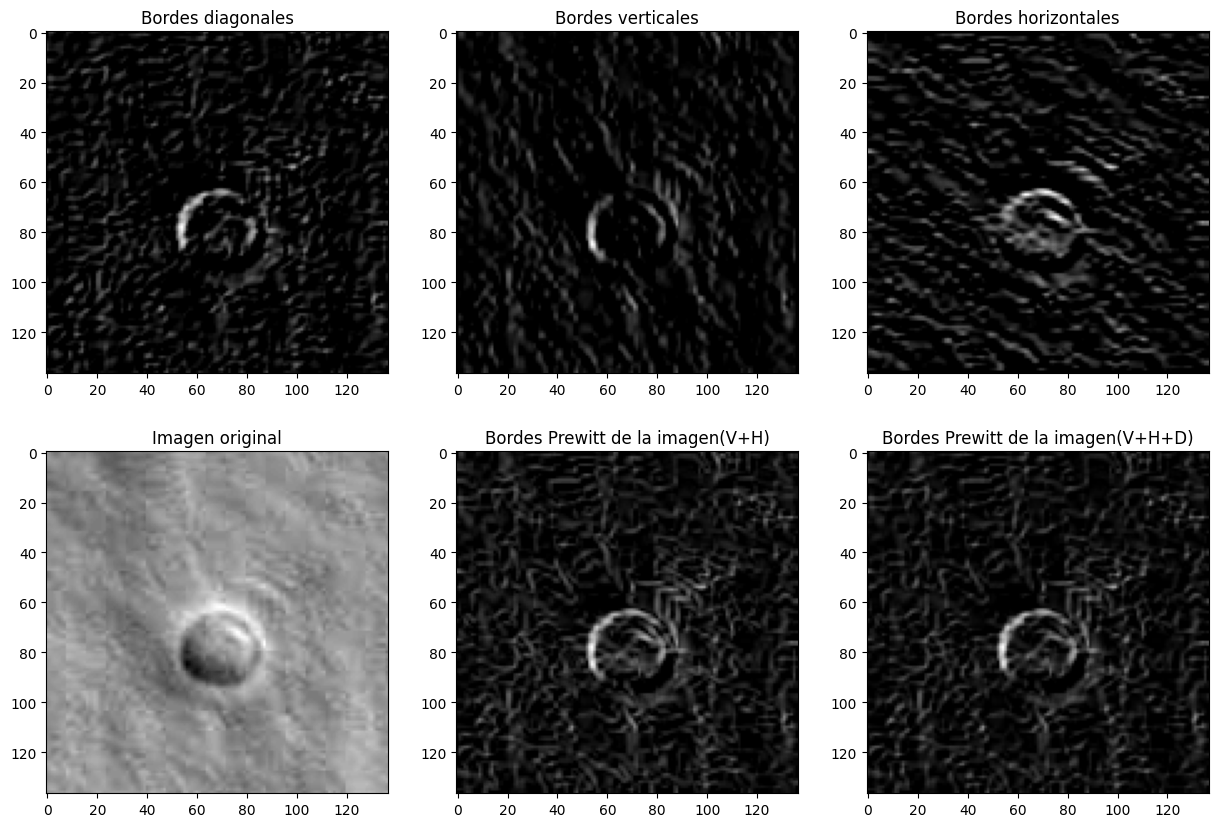

In [ ]:
OPrewitt_d = cv2.filter2D(img_analisis, -1, PrewittD) #Busca bordes diagonales de la imagen.
OPrewitt_v = cv2.filter2D(img_analisis, -1, PrewittV) #Busca bordes verticales de la imagen.
OPrewitt_h = cv2.filter2D(img_analisis, -1, PrewittH) #Busca bordes horizontales de la imagen
#-1 indica que me devuelve la imagen en el mismo formato. Probar sacando el -1

Bordes_Prewitt_VH = OPrewitt_v + OPrewitt_h
Bordes_Prewitt_VHD = OPrewitt_v + OPrewitt_h + OPrewitt_d
#La siguiente linea es para ver el tipo de dato de cada imagen filtrada y el valor de intesidad de un pixel especificado entre [x,y].
#print(OPrewitt_v.dtype,OPrewitt_v[20,20])
#print(OPrewitt_h.dtype,OPrewitt_h[20,20])
#print(OPrewitt_d.dtype,OPrewitt_d[20,20])
#print(Bordes.dtype,Bordes[15,15])
#Tipo de dato: uint8. Quiere decir que los valores van de 0 a 255.

plt.figure(figsize=(15,10))
plt.subplot(231),plt.imshow(OPrewitt_d,cmap='gray'),plt.title('Bordes diagonales')
plt.subplot(232),plt.imshow(OPrewitt_v,cmap='gray'),plt.title('Bordes verticales')
plt.subplot(233),plt.imshow(OPrewitt_h,cmap='gray'),plt.title('Bordes horizontales')
plt.subplot(234),plt.imshow(img_analisis,cmap='gray'),plt.title('Imagen original')
plt.subplot(235),plt.imshow(Bordes_Prewitt_VH,cmap='gray'),plt.title('Bordes Prewitt de la imagen(V+H)')
plt.subplot(236),plt.imshow(Bordes_Prewitt_VHD,cmap='gray'),plt.title('Bordes Prewitt de la imagen(V+H+D)')
plt.show()

In [ ]:
print(Bordes_Prewitt_VH)

[[ 0 20 22 ...  0  0  0]
 [ 0 18 19 ... 19 13 14]
 [ 0 11 13 ... 16 12 13]
 ...
 [ 0  0  2 ...  4  7  1]
 [ 9  9  7 ...  4  4  0]
 [ 0  0  0 ...  4  4  0]]


In [ ]:
#máscara/kernel Sobel 3x3:
#Para Bordes Verticales
SobelV = np.array( [[-1,0,1], [-2,0,2], [-1,0,1]] )
#Para Bordes Horizontales
SobelH = np.array( [[-1,-2,-1], [0,0,0], [1,2,1]] )

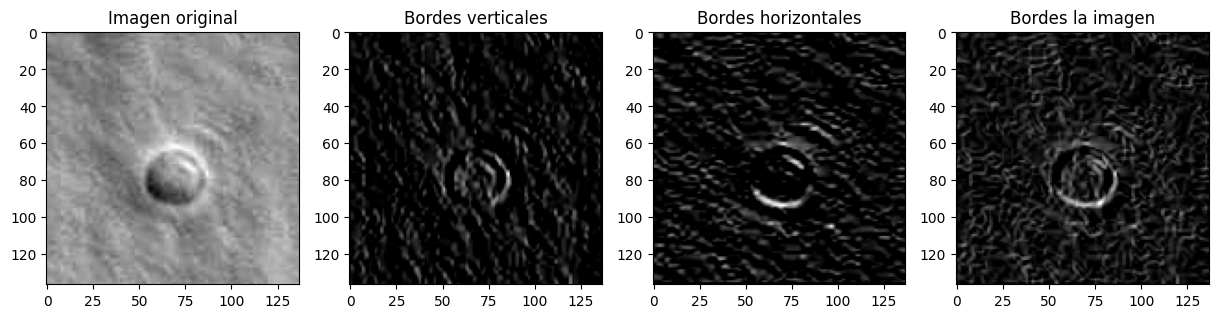

In [ ]:
OSobel_V = cv2.filter2D(img_analisis, -1, SobelV  )   # Busca bordes verticales de la imagen.
OSobel_H = cv2.filter2D(img_analisis, -1,  SobelH  )    #Bordes horizontales de la imagen

#Magnitud_Gradiente = np.sqrt(OP_v**2+OP_h**2) #PARA QUE SIRVE????????
#print("La magnitud del gradiente es: ", Magnitud_Gradiente)

Bordes_Sobel_VH= OSobel_V+ OSobel_H

plt.figure(figsize=(15,15))
plt.subplot(141),plt.imshow(img_analisis,cmap='gray'),plt.title('Imagen original')
plt.subplot(142),plt.imshow(OSobel_V,cmap='gray'),plt.title('Bordes verticales')
plt.subplot(143),plt.imshow(OSobel_H,cmap='gray'),plt.title('Bordes horizontales')
plt.subplot(144),plt.imshow(Bordes_Sobel_VH,cmap='gray'),plt.title('Bordes la imagen')
plt.show()

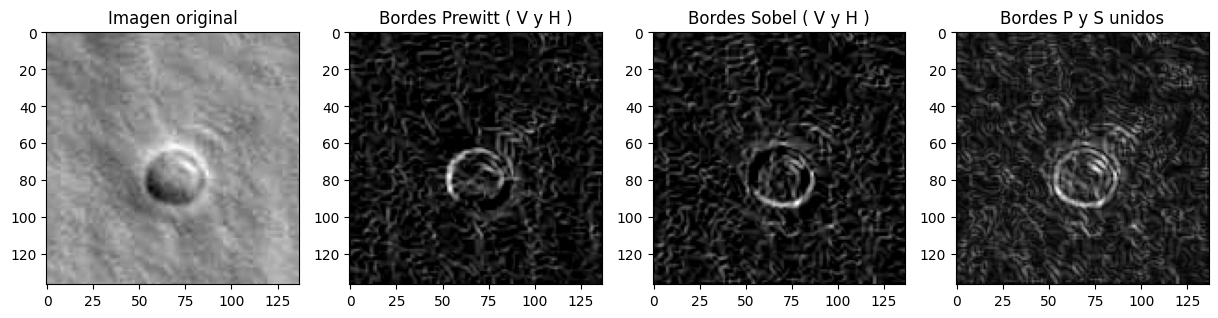

In [ ]:
Bordes_unidos_PS= Bordes_Prewitt_VH + Bordes_Sobel_VH
plt.figure(figsize=(15,15))
plt.subplot(141),plt.imshow(img_analisis,cmap='gray'),plt.title('Imagen original')
plt.subplot(142),plt.imshow(Bordes_Prewitt_VH,cmap='gray'),plt.title('Bordes Prewitt ( V y H )')
plt.subplot(143),plt.imshow(Bordes_Sobel_VH,cmap='gray'),plt.title('Bordes Sobel ( V y H )')
plt.subplot(144),plt.imshow(Bordes_unidos_PS,cmap='gray'),plt.title('Bordes P y S unidos')
plt.show()

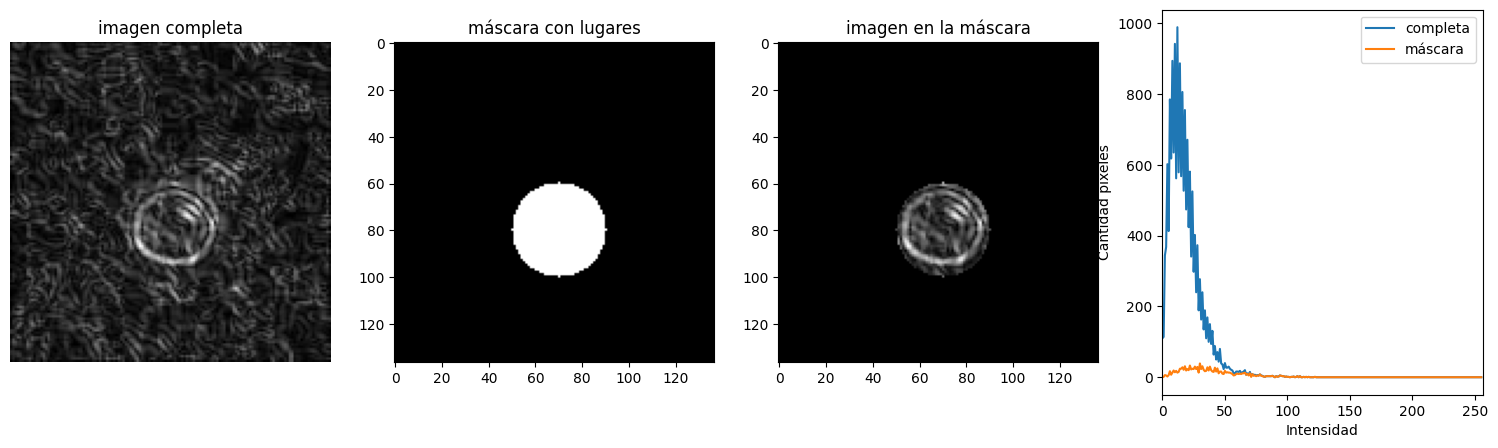

In [ ]:
#Analisis de "Bordes_unidos_PS"
mask_bordes = np.zeros(Bordes_unidos_PS.shape[:2], np.uint8) #Sacamos dimensiones de la imagen para el array de la mascara
mask_bordes = cv2.circle(mask_bordes,(70,80),20,(255),-1) #Mascara circular
masked_img_bordes=cv2.bitwise_and(Bordes_unidos_PS,mask_bordes) #Superponemos mascara por encima de la imagen.

hist_full_bordes = cv2.calcHist([Bordes_unidos_PS],[0],None,[256],[0,256])
hist_mask_bordes = cv2.calcHist([Bordes_unidos_PS],[0],mask_bordes,[256],[0,256])

plt.figure(figsize=(19,5))
plt.subplot(141), plt.imshow(Bordes_unidos_PS, 'gray'),plt.title('imagen completa'), plt.axis('off')
plt.subplot(142), plt.imshow(mask_bordes,'gray'),plt.title('máscara con lugares')
plt.subplot(143), plt.imshow(masked_img_bordes, 'gray'), plt.title('imagen en la máscara')
plt.subplot(144), plt.plot(hist_full_bordes), plt.plot(hist_mask_bordes),plt.xlabel('Intensidad'),plt.ylabel("Cantidad píxeles"),plt.legend(['completa', 'máscara'])
plt.xlim([0,256])

plt.show()

**Conclusion: Se desplazo mucho la intesidad de pixeles a la izquierda, teniendo picos en aproximadamente 10 de intesidad (imagen completa) y 25-27 (imagen filtrada con mascara). Se puede seguir probando este procesamiento para obtener un mejor resultado y un histograma mejor usable para una binarizacion**

In [ ]:
#Mascara Laplaciana 3x3:
Laplaciano = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]) # Kernel de filtro pasa alto, para resaltar bordes, detalles, cambios rápidos

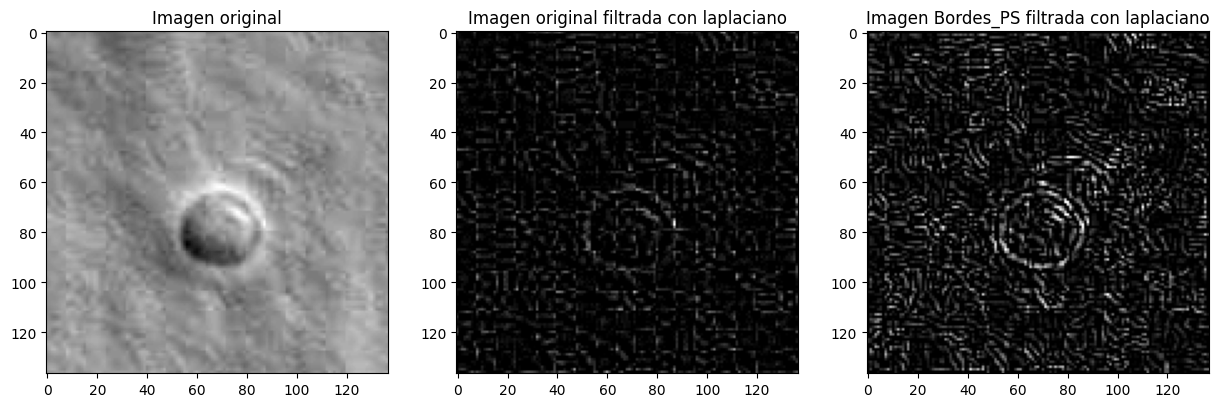

In [ ]:
Bordes_Laplaciano = cv2.filter2D(img_analisis, -1, Laplaciano  )   #filtramos la imagen original "img_analisis"
Bordes_unidos_PS_Laplaciano = cv2.filter2D(Bordes_unidos_PS, -1, Laplaciano  ) #filtramos la imagen de "Bordes_unidos_PS"

plt.figure(figsize=(15,10))
plt.subplot(131),plt.imshow(img_analisis,cmap='gray'),plt.title('Imagen original')
plt.subplot(132),plt.imshow(Bordes_Laplaciano,cmap='gray'),plt.title('Imagen original filtrada con laplaciano')
plt.subplot(133),plt.imshow(Bordes_unidos_PS_Laplaciano,cmap='gray'),plt.title('Imagen Bordes_PS filtrada con laplaciano')

plt.show()

**Conclusiones:\
-Si filtrmaos la imagen original con filtro Laplaciano Se obtiene una muestra muy fragmentada y con poco contraste en el contorno de la celula, dudoso analisis. Se puede probar mejorar.\
-Si filtramos la imagen Bordes_unidos_PS se realza el contorno por encima del ruido alrededor de la celula. Se puede seguir probando.**

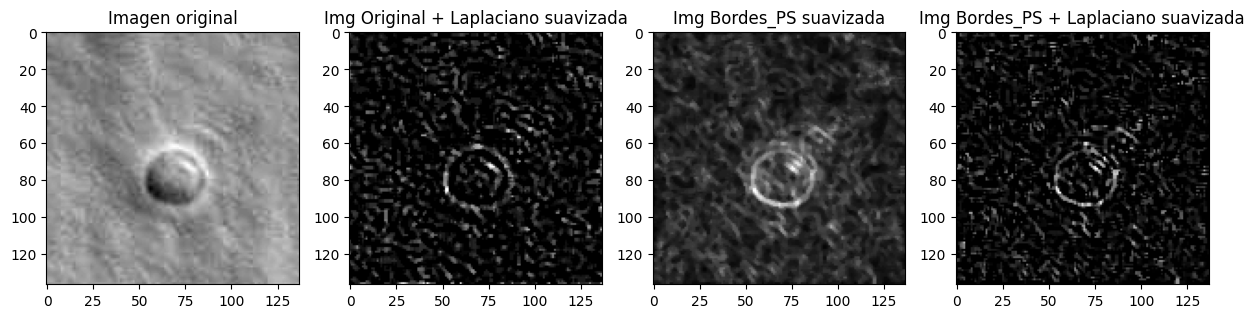

In [ ]:
#Vamos a probar un filtro de suavizado para disminuir el ruido alrededor de la célula.
I_med_laplaciano = cv2.medianBlur(Bordes_Laplaciano,3)
I_med_bordes_unidos_PS = cv2.medianBlur(Bordes_unidos_PS,3)
I_med_bordes_unidos_PS_Laplaciano = cv2.medianBlur(Bordes_unidos_PS_Laplaciano,3)

plt.figure(figsize=(15,15))
plt.subplot(141),plt.imshow(img_analisis,cmap='gray'),plt.title('Imagen original')
plt.subplot(142),plt.imshow(I_med_laplaciano,cmap='gray'),plt.title('Img Original + Laplaciano suavizada')
plt.subplot(143),plt.imshow(I_med_bordes_unidos_PS,cmap='gray'),plt.title('Img Bordes_PS suavizada')
plt.subplot(144),plt.imshow(I_med_bordes_unidos_PS_Laplaciano,cmap='gray'),plt.title('Img Bordes_PS + Laplaciano suavizada')


plt.show()

Conclusion:\
-En la primer imagen original con laplaciano y suavizado no me gusta. Parece que detecta el borde externo (se la ve mas grande)\
-En la Img Bordes_PS con suavizado podemos ver que el fondo empieza a perderse, los niveles de gris se combinan. Puede ser una buena forma de eliminar los valores altos del fondo. Si a la imagen resultante le sumamos una imagen trabajada en paralelo que tenga menos ruido. \
-La ultima me gusta un poco mas. Parece que detecta el borde interno (se la ve mas chica).\

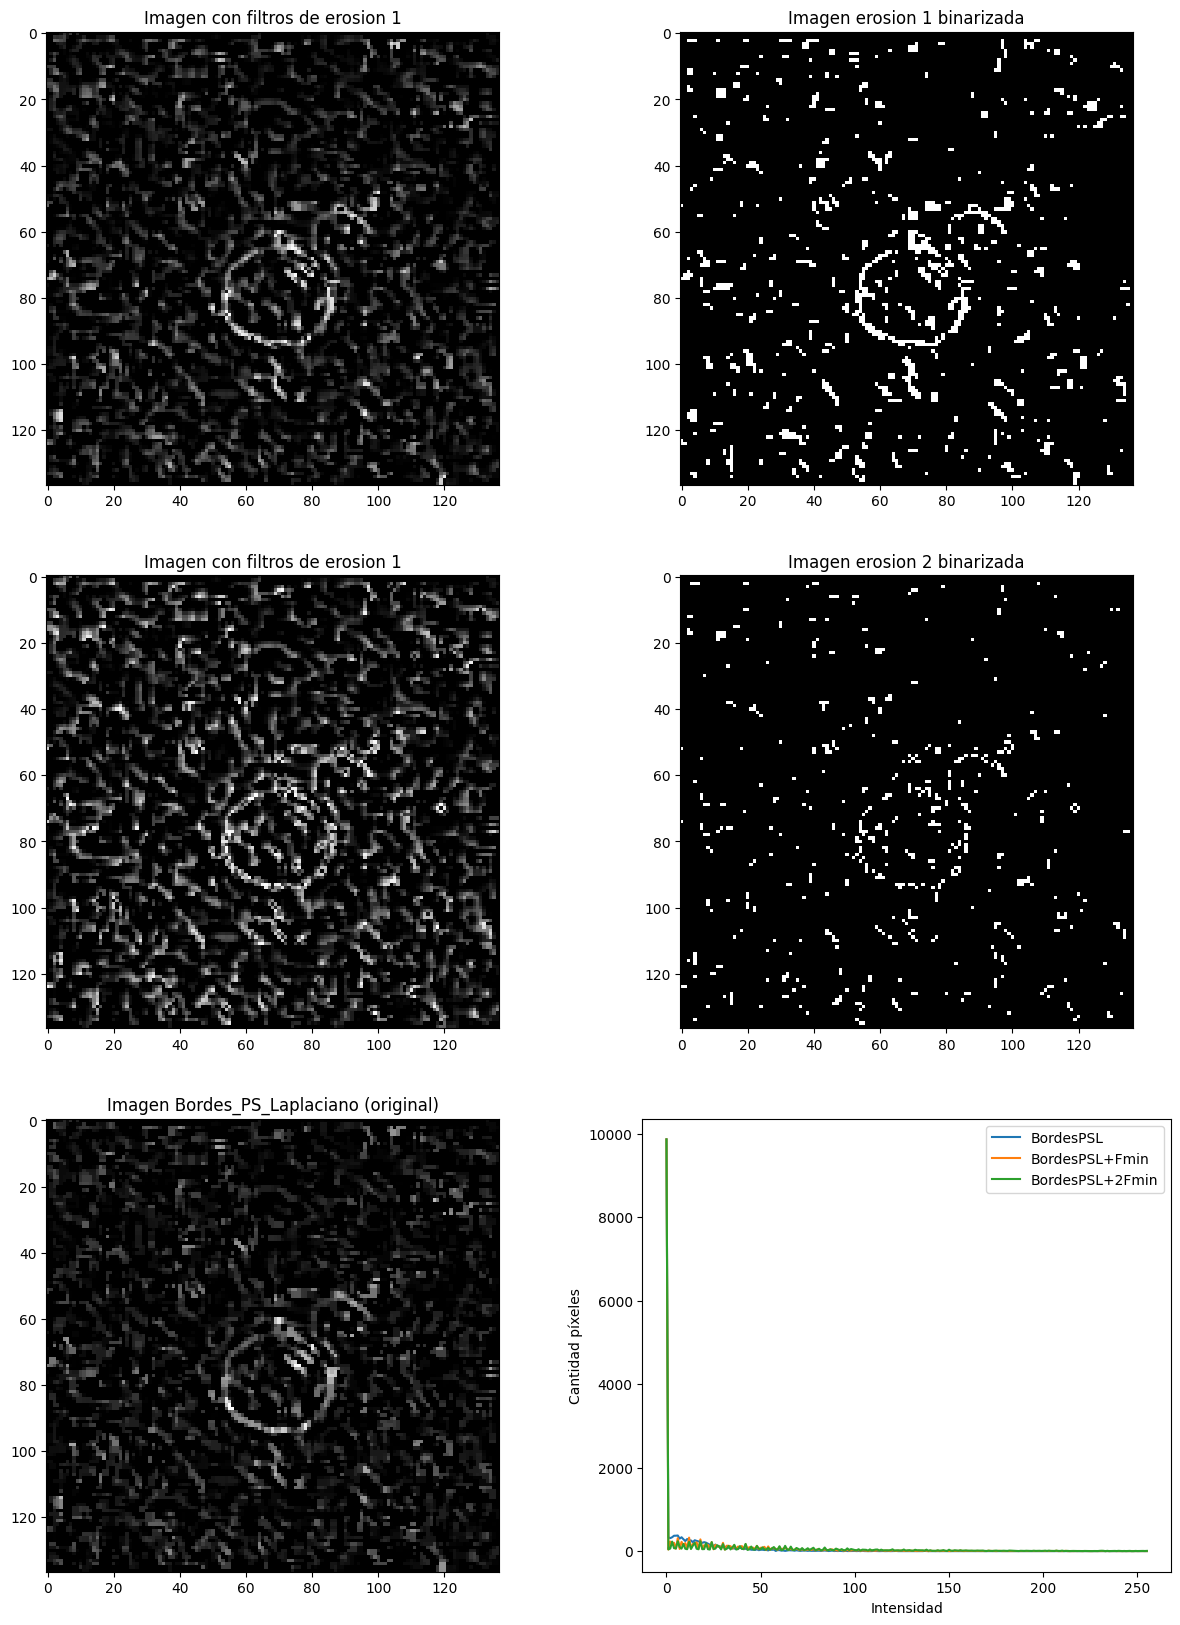

In [ ]:
kernel = np.ones((2,2), np.uint8) #dilata o contrae en todas las direcciones
kernel1 = np.ones((1,2), np.uint8) #dilata o contrae en direccion horizontal
kernel2 = np.ones((2,1), np.uint8) #dilata o contrae en direccion vertical

I_min_H = cv2.erode(I_med_bordes_unidos_PS_Laplaciano,kernel1,iterations=1) #filtro de minimo contraccion horizontal
I_min_V = cv2.erode(I_med_bordes_unidos_PS_Laplaciano,kernel2,iterations=1) #filtro de minimo contraccion vertical
I_min_HV = I_min_H+I_min_V #Unimos los outputs de las contracciones (tipo contraccion en cruz me imagino)
I_resultante = I_min_HV + I_med_bordes_unidos_PS_Laplaciano #Idea: Este resultado es bueno para deteccion por semisupervisado reinforcement

#Se empieza a arruinar, ruido (codigo de abajo intenta usar el output de I_resultante para volver a hacerle una erocion/contraccion)
I_min_HV_H1 = cv2.erode(I_resultante,kernel1,iterations=1)
I_min_HV_V1 = cv2.erode(I_resultante,kernel2,iterations=1)
I_min_HV_HV = I_min_HV_V1 + I_min_HV_H1
I_resultante_2 = I_min_HV_HV + I_med_bordes_unidos_PS_Laplaciano

#BINARIZAMOS (valor buscado a ojo ahora, ver bien que se pueda obtener del histograma. Tipo: "umbral = max(intensidad) - 50")
ret1,th1 = cv2.threshold(I_resultante,80,255,cv2.THRESH_BINARY)
ret2,th2 = cv2.threshold(I_resultante_2,160,255,cv2.THRESH_BINARY)

#Pruebo hacerle una dilatacion a los resultados binarizados
I_max=cv2.dilate(th1,kernel,iterations=1) #filtro de maximo, dilatacion.

hist_full_bordesPSL = cv2.calcHist([I_med_bordes_unidos_PS_Laplaciano],[0],None,[256],[0,256])
hist_full_bordesPSL_Fmin = cv2.calcHist([I_resultante],[0],None,[256],[0,256])
hist_full_bordesPSL_Fmin_2 = cv2.calcHist([I_resultante_2],[0],None,[256],[0,256])

plt.figure(figsize=(15,20))
plt.subplot(321),plt.imshow(I_resultante,cmap='gray'),plt.title('Imagen con filtros de erosion 1')
plt.subplot(322),plt.imshow(th1,cmap='gray'),plt.title('Imagen erosion 1 binarizada')
plt.subplot(323),plt.imshow(I_resultante_2,cmap='gray'),plt.title('Imagen con filtros de erosion 1')
plt.subplot(324),plt.imshow(th2,cmap='gray'),plt.title('Imagen erosion 2 binarizada')
plt.subplot(325),plt.imshow(I_med_bordes_unidos_PS_Laplaciano,cmap='gray'),plt.title('Imagen Bordes_PS_Laplaciano (original)')
plt.subplot(326), plt.plot(hist_full_bordesPSL), plt.plot(hist_full_bordesPSL_Fmin),plt.plot(hist_full_bordesPSL_Fmin_2),plt.xlabel('Intensidad'),plt.ylabel("Cantidad píxeles"),plt.legend(['BordesPSL', 'BordesPSL+Fmin','BordesPSL+2Fmin'])
plt.show()

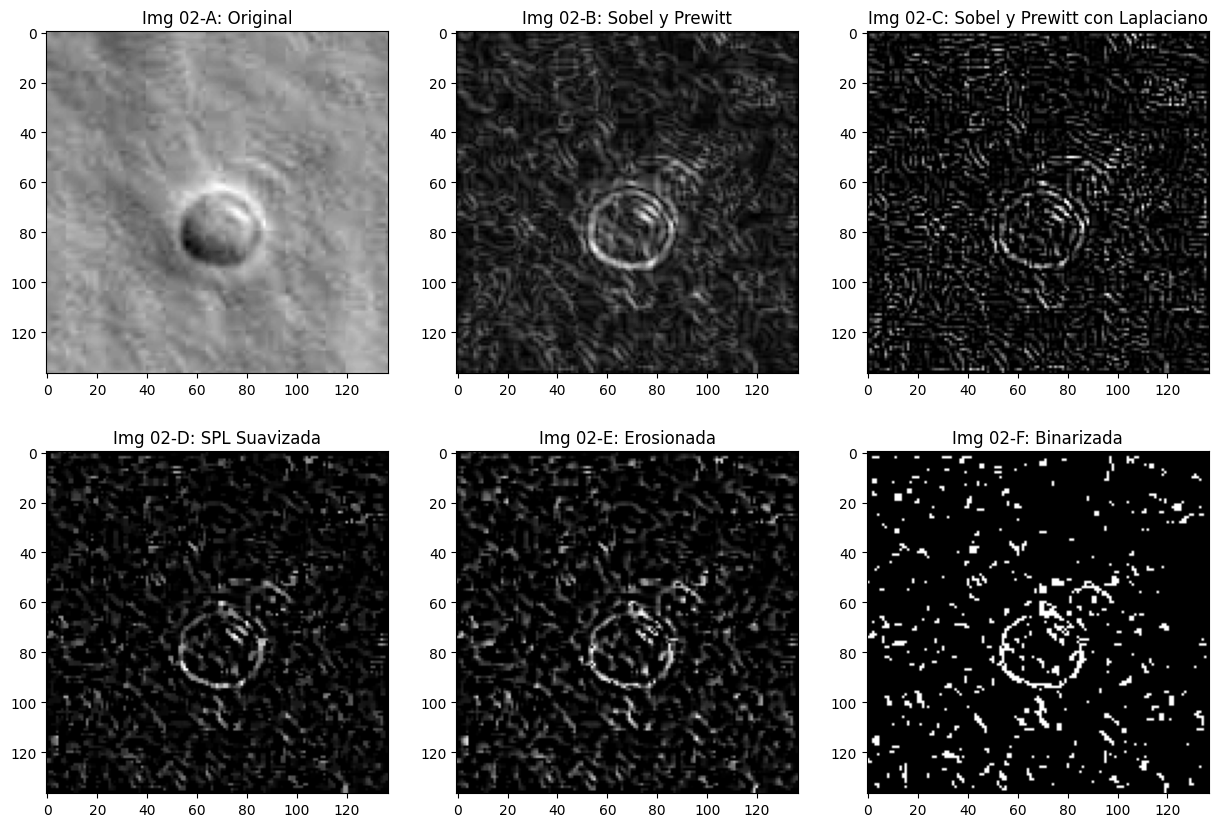

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(231),plt.imshow(img_analisis,cmap='gray'),plt.title('Img 02-A: Original')
plt.subplot(232),plt.imshow(Bordes_unidos_PS,cmap='gray'),plt.title('Img 02-B: Sobel y Prewitt')
plt.subplot(233),plt.imshow(Bordes_unidos_PS_Laplaciano,cmap='gray'),plt.title('Img 02-C: Sobel y Prewitt con Laplaciano')
plt.subplot(234),plt.imshow(I_med_bordes_unidos_PS_Laplaciano,cmap='gray'),plt.title('Img 02-D: SPL Suavizada')
plt.subplot(235),plt.imshow(I_resultante,cmap='gray'),plt.title('Img 02-E: Erosionada')
plt.subplot(236),plt.imshow(th1,cmap='gray'),plt.title('Img 02-F: Binarizada')
#plt.subplot(326), plt.plot(th1), plt.plot(hist_full_bordesPSL_Fmin),plt.plot(hist_full_bordesPSL_Fmin_2),plt.xlabel('Intensidad'),plt.ylabel("Cantidad píxeles"),plt.legend(['BordesPSL', 'BordesPSL+Fmin','BordesPSL+2Fmin'])
plt.show()







###PASAMOS A DF LAS SIGUIENTES IMAGENES:
-ORIGINAL CON NUEVAS CARACTERISTICAS\
-IMAGEN CON ETIQUETAS SEGUN ROIS\
ADJUNTAMOS ROIS AL DF DE LA ORIGINAL

In [ ]:
#th1 a dataframe

In [ ]:
dims = img_analisis.shape
cant_filas = dims[0]
cant_columnas = dims[1]
cant_pixeles = cant_filas*cant_columnas
data0 = np.zeros([cant_pixeles,4],dtype='int') #Es una variable en la que se guarda el tamaño del dataframe. Tiene cant de filas= cant_de pixeles y columnas= 4 columnas.
for f in range(cant_filas):
    for c in range(cant_columnas):
        nro = f*cant_columnas+c
        data0[nro,0] = nro
        data0[nro,1] = img_analisis[f,c]
        data0[nro,2] = I_resultante[f,c]
        data0[nro,3] = th1[f,c]

df = pd.DataFrame(data0, columns=["pixel_id","intensidad","filtrada","binarizada"]) #Armamos el dataframe

print('Tamaño de Base de pixeles:', df.shape)
df.head() #miramos las 5 primeras filas de la tabla


Tamaño de Base de pixeles: (18769, 4)


pixel_id  intensidad  filtrada  binarizada
0         0          62         0           0
1         1          59         0           0
2         2          54         0           0
3         3          51         0           0
4         4          51        12           0

In [ ]:
cantidad=0
for i in range(6):
    cantidad=cantidad+(rois[i][2]*rois[i][3])
print (cantidad)
data=np.zeros([cantidad,5],dtype='int')#Vector para armar el df, graficar y luego para entrenamiento
target=np.zeros(cantidad,dtype='int')#Vector para graficar despues y para entrenamiento
cuenta=0
for i in range(6):
    roi=rois[i]

    for fil in range (roi[1],roi[1]+roi[3]):
        for col in range (roi[0],roi[0]+roi[2]):
            nro=fil*cant_columnas+col
            data[cuenta,0]=nro
            data[cuenta,1]=img_analisis[fil,col]
            data[cuenta,2] = I_resultante[fil,col]
            data[cuenta,3] = th1[fil,col]
            data[cuenta,4]=i+1
            target[cuenta]=i+1
            cuenta=cuenta+1

df_etiquetado = pd.DataFrame(data, columns=["pixel_id","intensidad","filtrada","binarizada","etiqueta"])
print(df_etiquetado.shape)
print(df_etiquetado.etiqueta.unique())
print('Base de pixeles etiquetados:')
df_etiquetado.head(15)

2585
(2585, 5)
[1 2 3 4 5 6]
Base de pixeles etiquetados:


pixel_id  intensidad  filtrada  binarizada  etiqueta
0       9503          64        16           0         1
1       9504          68        50           0         1
2       9505          72        53           0         1
3       9506          75        63           0         1
4       9507          78        33           0         1
5       9508          80         0           0         1
6       9509          76         0           0         1
7       9510          73        38           0         1
8       9511          68       118         255         1
9       9512          62       135         255         1
10      9640          63        29           0         1
11      9641          66        73           0         1
12      9642          70        63           0         1
13      9643          73        33           0         1
14      9644          75         0           0         1

   pixel_id  intensidad  filtrada  binarizada  etiqueta
0         0          62         0           0         0
1         1          59         0           0         0
2         2          54         0           0         0
3         3          51         0           0         0
4         4          51        12           0         0
16189
18769
proporción de datos etiqueados: 0.1374607064840961


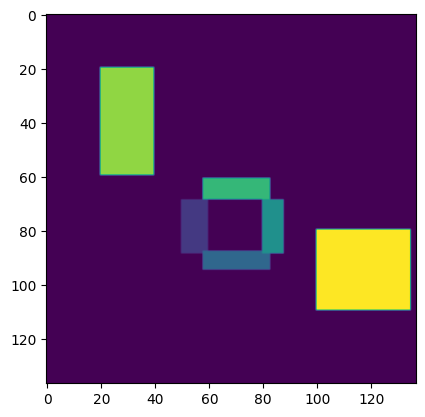

In [ ]:
#Base completa con etiquetas y no etiquetados en 0
a=img_analisis.shape
df_completo=df.copy()
df_completo.astype(int)# cambiar el tipo de dato
df_completo['etiqueta']=0*df_completo['intensidad']
#se asignan en el completo las etiquetas de ROIS
l=len(target)
for i in range(l):
    lugar=df_etiquetado['pixel_id'][i].astype(int)
    df_completo['etiqueta'][lugar]=df_etiquetado['etiqueta'][i]
print(df_completo.head())
print(sum(df_completo.etiqueta==0))
print(cant_pixeles)
print('proporción de datos etiqueados:',sum(df_completo.etiqueta!=0)/cant_pixeles)
clasif_rois=df_completo.etiqueta.values.reshape(a[0],a[1])
plt.imshow(clasif_rois)
plt.show()

###KNN CON N=3

In [ ]:
for i in range(100):
  n_neighbors = i+1
  data_3_canales=data[:,1:4]

  knn = KNeighborsClassifier(n_neighbors)
  knn.fit(data_3_canales, target)
  print('Presición (Accuracy) del clasificador K-NN en el conjunto de entrenamiento: {:.2f}'
      .format(knn.score(data_3_canales, target)))

Presición (Accuracy) del clasificador K-NN en el conjunto de entrenamiento: 0.71
Presición (Accuracy) del clasificador K-NN en el conjunto de entrenamiento: 0.53
Presición (Accuracy) del clasificador K-NN en el conjunto de entrenamiento: 0.58
Presición (Accuracy) del clasificador K-NN en el conjunto de entrenamiento: 0.57
Presición (Accuracy) del clasificador K-NN en el conjunto de entrenamiento: 0.57
Presición (Accuracy) del clasificador K-NN en el conjunto de entrenamiento: 0.60
Presición (Accuracy) del clasificador K-NN en el conjunto de entrenamiento: 0.62
Presición (Accuracy) del clasificador K-NN en el conjunto de entrenamiento: 0.61
Presición (Accuracy) del clasificador K-NN en el conjunto de entrenamiento: 0.61
Presición (Accuracy) del clasificador K-NN en el conjunto de entrenamiento: 0.62
Presición (Accuracy) del clasificador K-NN en el conjunto de entrenamiento: 0.62
Presición (Accuracy) del clasificador K-NN en el conjunto de entrenamiento: 0.63
Presición (Accuracy) del cla

In [ ]:
  n_neighbors = 3
  data_3_canales=data[:,1:4]

  knn3 = KNeighborsClassifier(n_neighbors)
  knn3.fit(data_3_canales, target)
  print('Presición (Accuracy) del clasificador K-NN en el conjunto de entrenamiento: {:.2f}'
      .format(knn3.score(data_3_canales, target)))

Presición (Accuracy) del clasificador K-NN en el conjunto de entrenamiento: 0.58


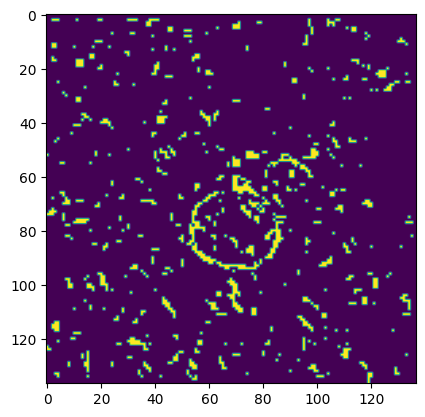

In [ ]:
plt.imshow(th1)

(181, 175)
[1]
Las dimensiones de la imagen clasificada son (181, 175)


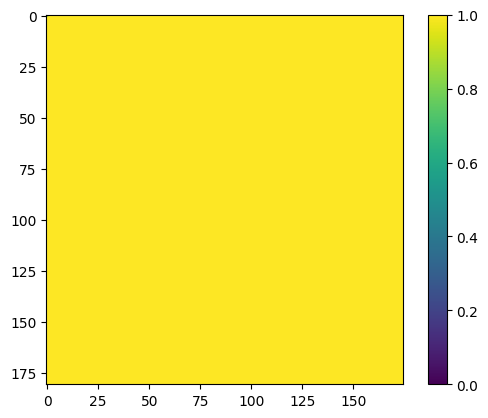

In [ ]:
a=img_analisis.shape
imagen_fusionada= np.zeros((a[0],a[1],3),dtype='int') #Tengo que ver lo del "137,137"
imagen_fusionada[:,:,0]=img_analisis
imagen_fusionada[:,:,1]=I_resultante
imagen_fusionada[:,:,2]=th1
print(a)
clasif=np.zeros(a[0:2],dtype='int')
print(knn3.predict([[40, 80, 40]]))
for i in range(a[0]): #filas
    for j in range(a[1]): #columnas
        clasif[i,j]=knn3.predict([imagen_fusionada[i,j,:]])
        if clasif[i,j] == 5:
          clasif[i,j]=2
        elif clasif[i,j] == 6:
          clasif[i,j]=2
        else:
          clasif[i,j]=1
#print("conteo 0: ", len(clasif[clasif ==0])) #No deja valor sin predecir. Eso es en asignacion progresiva. Co-training
#print("conteo 123456: ", len(clasif[clasif !=0]))
clasif[0,0]=0 #para unificar paletas (con 4 colores)
print('Las dimensiones de la imagen clasificada son',clasif.shape)
plt.imshow(clasif)
plt.colorbar()
plt.show()

In [ ]:
falso_rgb_imagen_=imagen_fusionada.copy()

In [ ]:
falso_rgb_imagen_2= imagen_fusionada.copy()


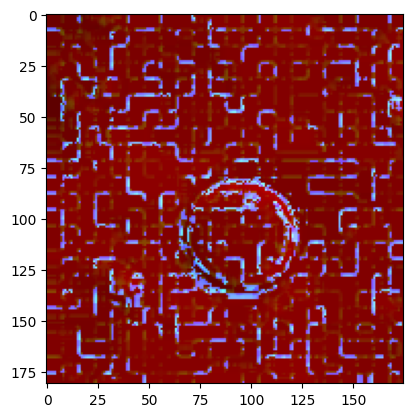

In [ ]:
plt.imshow(falso_rgb_imagen_)

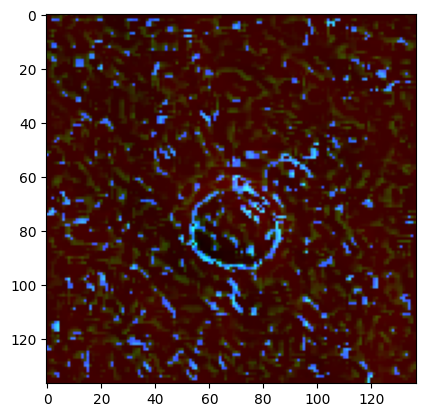

In [ ]:
plt.imshow(falso_rgb_imagen_2)

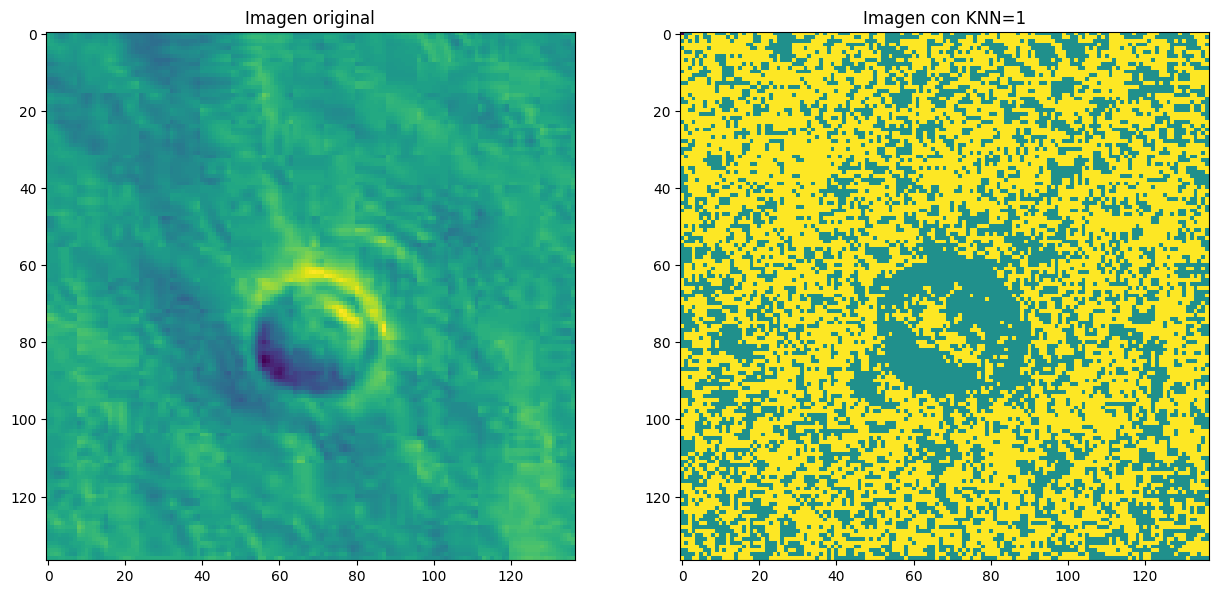

In [ ]:
plt.figure(figsize=(15,20))
plt.subplot(121),plt.imshow(img_analisis),plt.title('Imagen original')
plt.subplot(122),plt.imshow(clasif),plt.title('Imagen con KNN=1')
plt.show()

In [ ]:
from statistics import mode
g=clasif.astype('float32')
p=cv2.medianBlur(g,5)
print(np.unique(p))
clasif2=p.copy()

for i in range(2,a[0]-1): #filas
    for j in range(2,a[1]-1): #columnas
        try:
            clasif2[i,j]=mode(clasif[i-3:i+3,j-3:j+3].ravel())
        except:
            clasif2[i,j]=clasif[i,j]
clasif2[0,0]=0 #para unificar paletas (con 4 colores)

[1. 2.]


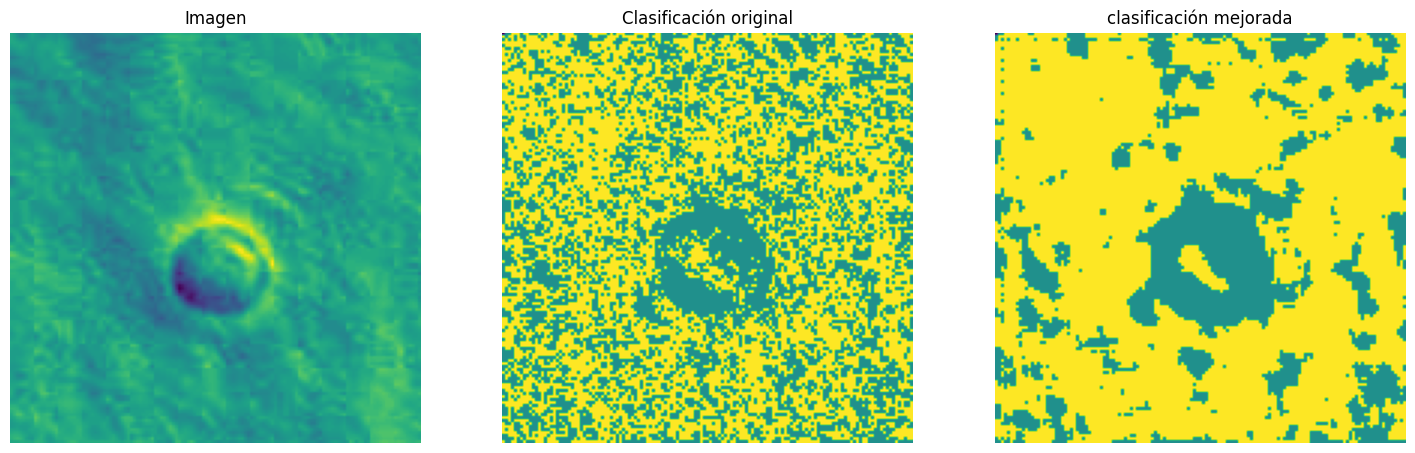

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True)
fig.set_figheight(10)
fig.set_figwidth(18)
axs[0].imshow(img_analisis)
axs[0].set_title("Imagen")
axs[0].axis('off')
axs[1].imshow(clasif)
axs[1].set_title("Clasificación original")
axs[1].axis('off')
axs[2].imshow(clasif2)
axs[2].set_title('clasificación mejorada')
axs[2].axis('off')
plt.show()

In [ ]:
#Sin entrenar
print("Cantidad de datos: ", len(df_completo.etiqueta))
print("Cantidad de datos etiquetados: ", df_completo.etiqueta[df_completo.etiqueta != 0].count())
print("Cantidad de datos no etiquetados: ", df_completo.etiqueta[df_completo.etiqueta == 0].count())

Cantidad de datos:  18769
Cantidad de datos etiquetados:  2580
Cantidad de datos no etiquetados:  16189


In [ ]:
#Con entrenamiento KNN=1
print("Cantidad de datos: ", len(clasif))
print("Cantidad de datos etiquetados: ", len(clasif[clasif != 0]))
print("Cantidad de datos no etiquetados: ", len(clasif[clasif==0]))

Cantidad de datos:  137
Cantidad de datos etiquetados:  18768
Cantidad de datos no etiquetados:  1


KNN CON ASIGNAMIENTO PROGRASIVO (ITERACIONES) - KNN CO-LEARNING

In [ ]:
n_neighbors = 1
knn1 = KNeighborsClassifier(n_neighbors)
knn1.fit(data_3_canales, target)
print('Presición (Accuracy) del clasificador K-NN con k=6 en el conjunto de entrenamiento: {:.2f}'
     .format(knn1.score(data_3_canales, target)))

Presición (Accuracy) del clasificador K-NN con k=6 en el conjunto de entrenamiento: 0.71


In [ ]:
n_neighbors = 7
knn7 = KNeighborsClassifier(n_neighbors)
knn7.fit(data_3_canales, target)
print('Presición (Accuracy) del clasificador K-NN con k=6 en el conjunto de entrenamiento: {:.2f}'
     .format(knn7.score(data_3_canales, target)))

Presición (Accuracy) del clasificador K-NN con k=6 en el conjunto de entrenamiento: 0.62


In [ ]:
n_neighbors = 17
knn17 = KNeighborsClassifier(n_neighbors)
knn17.fit(data_3_canales, target)
print('Presición (Accuracy) del clasificador K-NN con k=6 en el conjunto de entrenamiento: {:.2f}'
     .format(knn17.score(data_3_canales, target)))

Presición (Accuracy) del clasificador K-NN con k=6 en el conjunto de entrenamiento: 0.68


In [ ]:
n_neighbors = 17
knn17 = KNeighborsClassifier(n_neighbors)
knn17.fit(data_3_canales, target)
print('Presición (Accuracy) del clasificador K-NN con k=6 en el conjunto de entrenamiento: {:.2f}'
     .format(knn17.score(data_3_canales, target)))

Presición (Accuracy) del clasificador K-NN con k=6 en el conjunto de entrenamiento: 0.68


In [ ]:
n_neighbors = 21
knn21 = KNeighborsClassifier(n_neighbors)
knn21.fit(data_3_canales, target)
print('Presición (Accuracy) del clasificador K-NN con k=6 en el conjunto de entrenamiento: {:.2f}'
     .format(knn21.score(data_3_canales, target)))

Presición (Accuracy) del clasificador K-NN con k=6 en el conjunto de entrenamiento: 0.68


In [ ]:
n_neighbors = 28
knn28 = KNeighborsClassifier(n_neighbors)
knn28.fit(data_3_canales, target)
print('Presición (Accuracy) del clasificador K-NN con k=6 en el conjunto de entrenamiento: {:.2f}'
     .format(knn28.score(data_3_canales, target)))

Presición (Accuracy) del clasificador K-NN con k=6 en el conjunto de entrenamiento: 0.70


datos sin etiquetar: 5621
proporción de datos sin etiquetar: [0.2994831903670947]


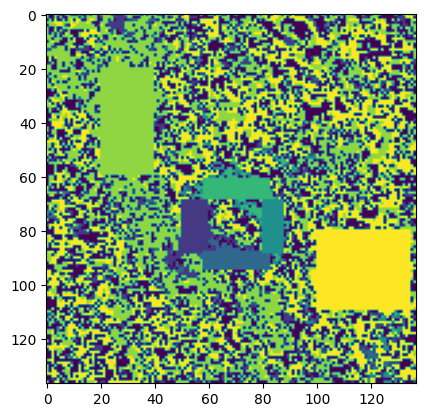

In [ ]:
##loop 1
prop=[]
r1s= knn3.predict(data0[:,1:4])
r2s= knn7.predict(data0[:,1:4])
for i in range(cant_pixeles):
    if df_completo.etiqueta[i]==0:
        r1= r1s[i]
        r2= r2s[i]
        if r1==r2:
            df_completo.etiqueta[i]=r1

print('datos sin etiquetar:',(sum(df_completo.etiqueta==0)) )

clasif_iter=df_completo.etiqueta.values.reshape(a[0],a[1])

prop.append(sum(df_completo.etiqueta==0)/cant_pixeles)
print('proporción de datos sin etiquetar:',prop)
plt.imshow(clasif_iter)


de datos sin etiquetar: 2530
proporción de datos sin etiquetar: [0.2994831903670947, 0.13479673930417177]
de datos sin etiquetar: 1276
proporción de datos sin etiquetar: [0.2994831903670947, 0.13479673930417177, 0.06798444243166925]
de datos sin etiquetar: 859
proporción de datos sin etiquetar: [0.2994831903670947, 0.13479673930417177, 0.06798444243166925, 0.04576695615110022]
de datos sin etiquetar: 835
proporción de datos sin etiquetar: [0.2994831903670947, 0.13479673930417177, 0.06798444243166925, 0.04576695615110022, 0.044488251904736535]


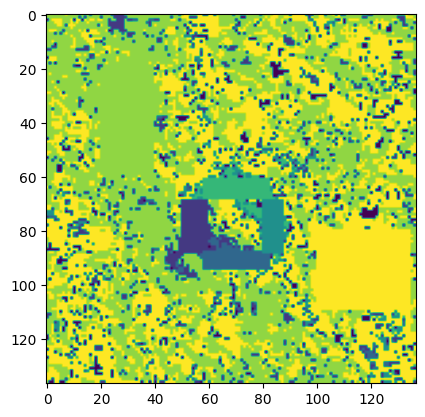

In [ ]:
##loop 2 a 10
for i in range(4):
  data_rgb=df_completo[df_completo.etiqueta!=0].values[:,1:4]
  target=df_completo.etiqueta[df_completo.etiqueta!=0]
  knn.fit(data_rgb, target)
  knn7.fit(data_rgb, target)

  r1s= knn.predict(data0[:,1:4])
  r2s= knn7.predict(data0[:,1:4])
  for i in range(cant_pixeles):
      if df_completo.etiqueta[i]==0:
          r1= r1s[i]
          r2= r2s[i]
          if r1==r2:
              df_completo.etiqueta[i]=r1

  print('de datos sin etiquetar:',sum(df_completo.etiqueta==0))

  clasif_iter=df_completo.etiqueta.values.reshape(a[0],a[1])

  prop.append(sum(df_completo.etiqueta==0)/cant_pixeles)
  print('proporción de datos sin etiquetar:',prop)
  plt.imshow(clasif_iter)

de datos sin etiquetar: 129
proporción de datos sin etiquetar: [0.2994831903670947, 0.13479673930417177, 0.06798444243166925, 0.04576695615110022, 0.044488251904736535, 0.006873035324204806]
de datos sin etiquetar: 114
proporción de datos sin etiquetar: [0.2994831903670947, 0.13479673930417177, 0.06798444243166925, 0.04576695615110022, 0.044488251904736535, 0.006873035324204806, 0.006073845170227503]
de datos sin etiquetar: 108
proporción de datos sin etiquetar: [0.2994831903670947, 0.13479673930417177, 0.06798444243166925, 0.04576695615110022, 0.044488251904736535, 0.006873035324204806, 0.006073845170227503, 0.0057541691086365815]
de datos sin etiquetar: 105
proporción de datos sin etiquetar: [0.2994831903670947, 0.13479673930417177, 0.06798444243166925, 0.04576695615110022, 0.044488251904736535, 0.006873035324204806, 0.006073845170227503, 0.0057541691086365815, 0.005594331077841121]


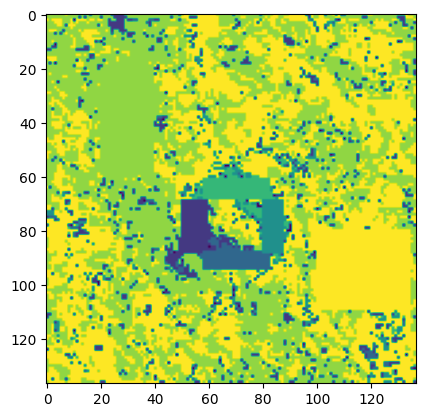

In [ ]:
##loop 2 a 10
for i in range(4):
  data_rgb=df_completo[df_completo.etiqueta!=0].values[:,1:4]
  target=df_completo.etiqueta[df_completo.etiqueta!=0]
  knn.fit(data_rgb, target)
  knn17.fit(data_rgb, target)

  r1s= knn.predict(data0[:,1:4])
  r2s= knn17.predict(data0[:,1:4])
  for i in range(cant_pixeles):
      if df_completo.etiqueta[i]==0:
          r1= r1s[i]
          r2= r2s[i]
          if r1==r2:
              df_completo.etiqueta[i]=r1

  print('de datos sin etiquetar:',sum(df_completo.etiqueta==0))

  clasif_iter=df_completo.etiqueta.values.reshape(a[0],a[1])

  prop.append(sum(df_completo.etiqueta==0)/cant_pixeles)
  print('proporción de datos sin etiquetar:',prop)
  plt.imshow(clasif_iter)

de datos sin etiquetar: 101
proporción de datos sin etiquetar: [0.2994831903670947, 0.13479673930417177, 0.06798444243166925, 0.04576695615110022, 0.044488251904736535, 0.006873035324204806, 0.006073845170227503, 0.0057541691086365815, 0.005594331077841121, 0.005381213703447174]
de datos sin etiquetar: 80
proporción de datos sin etiquetar: [0.2994831903670947, 0.13479673930417177, 0.06798444243166925, 0.04576695615110022, 0.044488251904736535, 0.006873035324204806, 0.006073845170227503, 0.0057541691086365815, 0.005594331077841121, 0.005381213703447174, 0.00426234748787895]
de datos sin etiquetar: 79
proporción de datos sin etiquetar: [0.2994831903670947, 0.13479673930417177, 0.06798444243166925, 0.04576695615110022, 0.044488251904736535, 0.006873035324204806, 0.006073845170227503, 0.0057541691086365815, 0.005594331077841121, 0.005381213703447174, 0.00426234748787895, 0.004209068144280462]
de datos sin etiquetar: 79
proporción de datos sin etiquetar: [0.2994831903670947, 0.1347967393041

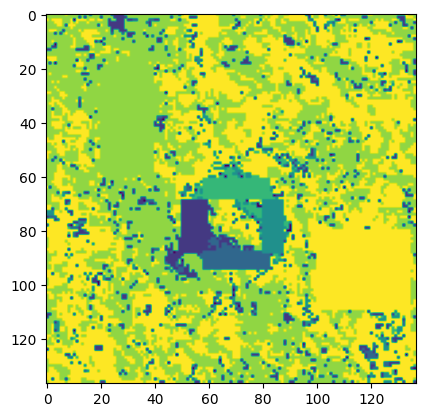

In [ ]:
##loop 2 a 10
for i in range(4):
  data_rgb=df_completo[df_completo.etiqueta!=0].values[:,1:4]
  target=df_completo.etiqueta[df_completo.etiqueta!=0]
  knn.fit(data_rgb, target)
  knn1.fit(data_rgb, target)

  r1s= knn.predict(data0[:,1:4])
  r2s= knn1.predict(data0[:,1:4])
  for i in range(cant_pixeles):
      if df_completo.etiqueta[i]==0:
          r1= r1s[i]
          r2= r2s[i]
          if r1==r2:
              df_completo.etiqueta[i]=r1

  print('de datos sin etiquetar:',sum(df_completo.etiqueta==0))

  clasif_iter=df_completo.etiqueta.values.reshape(a[0],a[1])

  prop.append(sum(df_completo.etiqueta==0)/cant_pixeles)
  print('proporción de datos sin etiquetar:',prop)
  plt.imshow(clasif_iter)

de datos sin etiquetar: 76
proporción de datos sin etiquetar: [0.2994831903670947, 0.13479673930417177, 0.06798444243166925, 0.04576695615110022, 0.044488251904736535, 0.006873035324204806, 0.006073845170227503, 0.0057541691086365815, 0.005594331077841121, 0.005381213703447174, 0.00426234748787895, 0.004209068144280462, 0.004209068144280462, 0.004209068144280462, 0.004209068144280462, 0.004049230113485002]
de datos sin etiquetar: 74
proporción de datos sin etiquetar: [0.2994831903670947, 0.13479673930417177, 0.06798444243166925, 0.04576695615110022, 0.044488251904736535, 0.006873035324204806, 0.006073845170227503, 0.0057541691086365815, 0.005594331077841121, 0.005381213703447174, 0.00426234748787895, 0.004209068144280462, 0.004209068144280462, 0.004209068144280462, 0.004209068144280462, 0.004049230113485002, 0.003942671426288028]


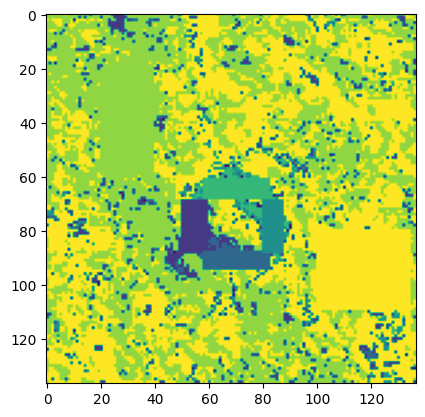

In [ ]:
##loop 2 a 10
for i in range(2):
  data_rgb=df_completo[df_completo.etiqueta!=0].values[:,1:4]
  target=df_completo.etiqueta[df_completo.etiqueta!=0]
  knn.fit(data_rgb, target)
  knn17.fit(data_rgb, target)

  r1s= knn.predict(data0[:,1:4])
  r2s= knn17.predict(data0[:,1:4])
  for i in range(cant_pixeles):
      if df_completo.etiqueta[i]==0:
          r1= r1s[i]
          r2= r2s[i]
          if r1==r2:
              df_completo.etiqueta[i]=r1

  print('de datos sin etiquetar:',sum(df_completo.etiqueta==0))

  clasif_iter=df_completo.etiqueta.values.reshape(a[0],a[1])

  prop.append(sum(df_completo.etiqueta==0)/cant_pixeles)
  print('proporción de datos sin etiquetar:',prop)
  plt.imshow(clasif_iter)

de datos sin etiquetar: 60
proporción de datos sin etiquetar: [0.2994831903670947, 0.13479673930417177, 0.06798444243166925, 0.04576695615110022, 0.044488251904736535, 0.006873035324204806, 0.006073845170227503, 0.0057541691086365815, 0.005594331077841121, 0.005381213703447174, 0.00426234748787895, 0.004209068144280462, 0.004209068144280462, 0.004209068144280462, 0.004209068144280462, 0.004049230113485002, 0.003942671426288028, 0.003196760615909212]
de datos sin etiquetar: 57
proporción de datos sin etiquetar: [0.2994831903670947, 0.13479673930417177, 0.06798444243166925, 0.04576695615110022, 0.044488251904736535, 0.006873035324204806, 0.006073845170227503, 0.0057541691086365815, 0.005594331077841121, 0.005381213703447174, 0.00426234748787895, 0.004209068144280462, 0.004209068144280462, 0.004209068144280462, 0.004209068144280462, 0.004049230113485002, 0.003942671426288028, 0.003196760615909212, 0.0030369225851137513]
de datos sin etiquetar: 52
proporción de datos sin etiquetar: [0.2994

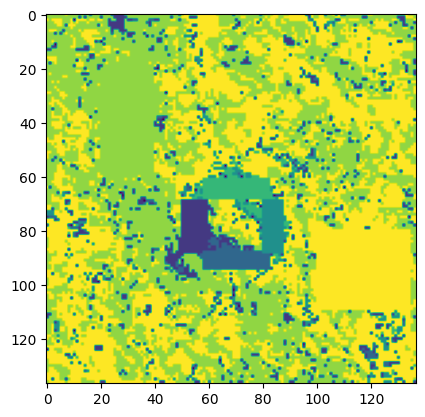

In [ ]:
##loop 2 a 10
for i in range(3):
  data_rgb=df_completo[df_completo.etiqueta!=0].values[:,1:4]
  target=df_completo.etiqueta[df_completo.etiqueta!=0]
  knn.fit(data_rgb, target)
  knn21.fit(data_rgb, target)

  r1s= knn.predict(data0[:,1:4])
  r2s= knn21.predict(data0[:,1:4])
  for i in range(cant_pixeles):
      if df_completo.etiqueta[i]==0:
          r1= r1s[i]
          r2= r2s[i]
          if r1==r2:
              df_completo.etiqueta[i]=r1

  print('de datos sin etiquetar:',sum(df_completo.etiqueta==0))

  clasif_iter=df_completo.etiqueta.values.reshape(a[0],a[1])

  prop.append(sum(df_completo.etiqueta==0)/cant_pixeles)
  print('proporción de datos sin etiquetar:',prop)
  plt.imshow(clasif_iter)

de datos sin etiquetar: 747
proporción de datos sin etiquetar: [0.35958228994618785, 0.19111300548777238, 0.10778411209973893, 0.08876338643507913, 0.04763173317704726, 0.04331610634556982, 0.041557888006819754, 0.040332463104054556, 0.039906228355266665, 0.03979966966806969]
de datos sin etiquetar: 746
proporción de datos sin etiquetar: [0.35958228994618785, 0.19111300548777238, 0.10778411209973893, 0.08876338643507913, 0.04763173317704726, 0.04331610634556982, 0.041557888006819754, 0.040332463104054556, 0.039906228355266665, 0.03979966966806969, 0.0397463903244712]
de datos sin etiquetar: 743
proporción de datos sin etiquetar: [0.35958228994618785, 0.19111300548777238, 0.10778411209973893, 0.08876338643507913, 0.04763173317704726, 0.04331610634556982, 0.041557888006819754, 0.040332463104054556, 0.039906228355266665, 0.03979966966806969, 0.0397463903244712, 0.03958655229367574]
de datos sin etiquetar: 743
proporción de datos sin etiquetar: [0.35958228994618785, 0.19111300548777238, 0.

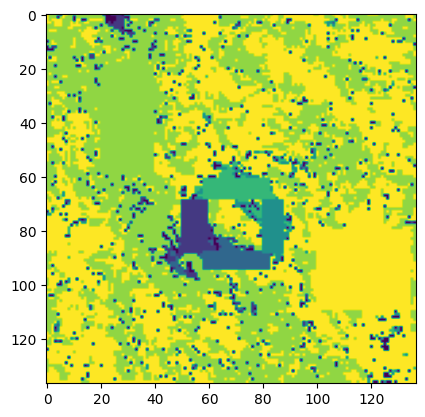

In [ ]:
##loop 2 a 10
for i in range(4):
  data_rgb=df_completo[df_completo.etiqueta!=0].values[:,1:4]
  target=df_completo.etiqueta[df_completo.etiqueta!=0]
  knn.fit(data_rgb, target)
  knn21.fit(data_rgb, target)

  r1s= knn.predict(data0[:,1:4])
  r2s= knn21.predict(data0[:,1:4])
  for i in range(cant_pixeles):
      if df_completo.etiqueta[i]==0:
          r1= r1s[i]
          r2= r2s[i]
          if r1==r2:
              df_completo.etiqueta[i]=r1

  print('de datos sin etiquetar:',sum(df_completo.etiqueta==0))

  clasif_iter=df_completo.etiqueta.values.reshape(a[0],a[1])

  prop.append(sum(df_completo.etiqueta==0)/cant_pixeles)
  print('proporción de datos sin etiquetar:',prop)
  plt.imshow(clasif_iter)

(137, 137)
Las dimensiones de la imagen clasificada son (137, 137)


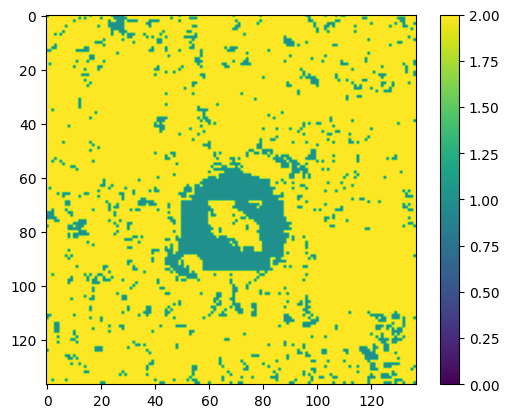

In [ ]:
a=img_analisis.shape
print(a)
clasif_iterada=np.zeros(a[0:2],dtype='int')
clasif_iterada=df_completo.etiqueta.values.reshape(a[0],a[1])
for i in range(a[0]): #filas
    for j in range(a[1]): #columnas
        if clasif_iterada[i,j] == 5:
          clasif_iterada[i,j]=2
        elif clasif_iterada[i,j] == 6:
          clasif_iterada[i,j]=2
        else:
          clasif_iterada[i,j]=1
#print("conteo 0: ", len(clasif_iterada[clasif_iterada ==0])) #No deja valor sin predecir. Eso es en asignacion progresiva. Co-training
#print("conteo 123456: ", len(clasif_iterada[clasif_iterada !=0]))
clasif_iterada[0,0]=0 #para unificar paletas (con 4 colores)
print('Las dimensiones de la imagen clasificada son',clasif_iterada.shape)
plt.imshow(clasif_iterada)
plt.colorbar()
plt.show()

[1. 2.]


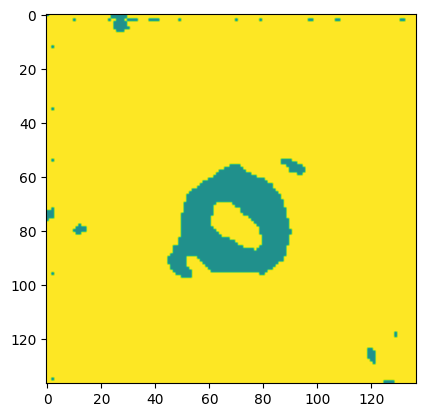

In [ ]:
#Mejoramiento por moda de la iterada con knn: clasif_iterada_mejorada
from statistics import mode
g=clasif_iterada.astype('float32')
p=cv2.medianBlur(g,5)
print(np.unique(p))
clasif_iterada_mejorada=p.copy()

for i in range(2,a[0]-1): #filas
    for j in range(2,a[1]-1): #columnas
        try:
            clasif_iterada_mejorada[i,j]=mode(clasif_iterada[i-3:i+3,j-3:j+3].ravel())
        except:
            clasif_iterada_mejorada[i,j]=clasif_iterada[i,j]
clasif_iterada_mejorada[0,0]=0 #para unificar paletas (con 4 colores)
plt.imshow(clasif_iterada_mejorada)

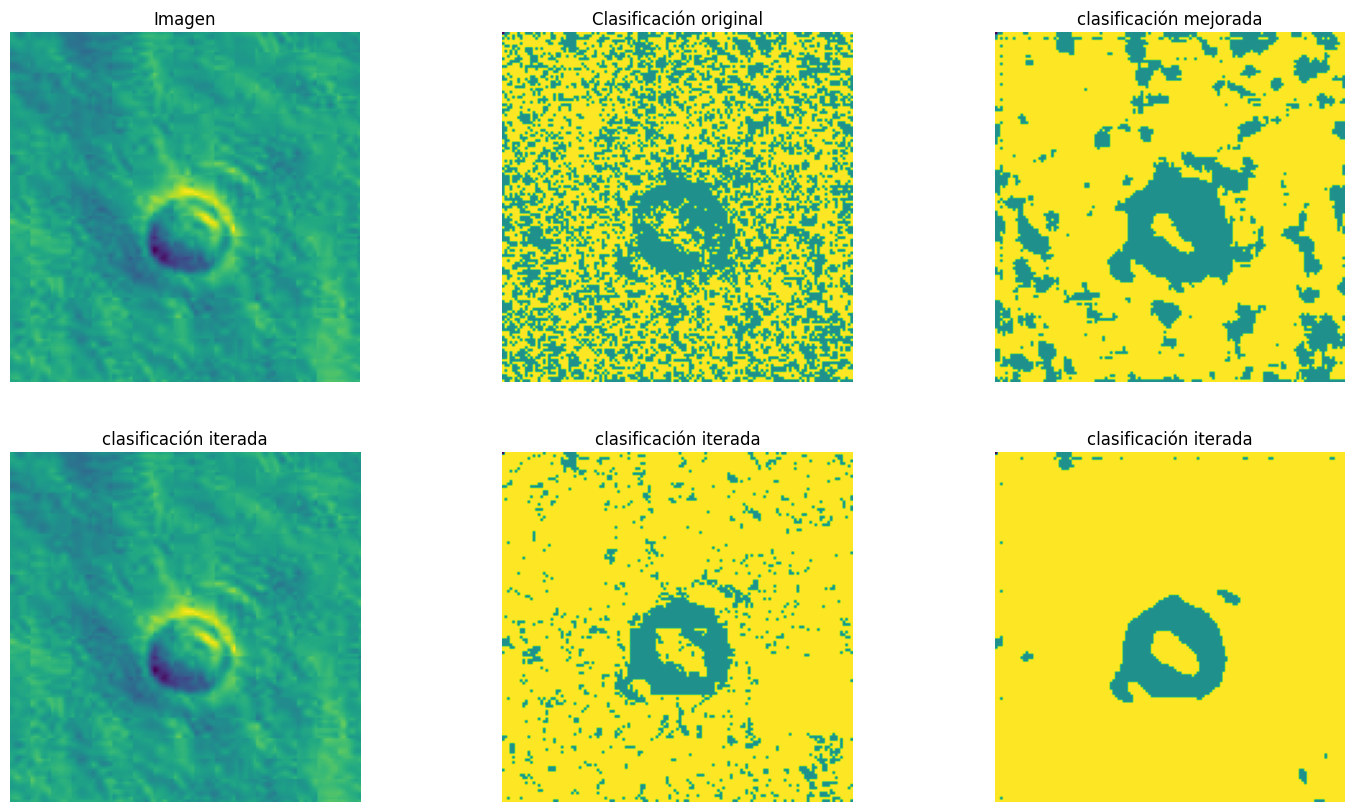

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, sharex=True)
fig.set_figheight(10)
fig.set_figwidth(18)
axs[0][0].imshow(img_analisis)
axs[0][0].set_title("Imagen")
axs[0][0].axis('off')
axs[0][1].imshow(clasif)
axs[0][1].set_title("Clasificación original")
axs[0][1].axis('off')
axs[0][2].imshow(clasif2)
axs[0][2].set_title('clasificación mejorada')
axs[0][2].axis('off')
axs[1][0].imshow(img_analisis)
axs[1][0].set_title('clasificación iterada')
axs[1][0].axis('off')
axs[1][1].imshow(clasif_iterada)
axs[1][1].set_title('clasificación iterada')
axs[1][1].axis('off')
axs[1][2].imshow(clasif_iterada_mejorada)
axs[1][2].set_title('clasificación iterada')
axs[1][2].axis('off')
plt.show()

###ANALISIS DE GRAFICOS

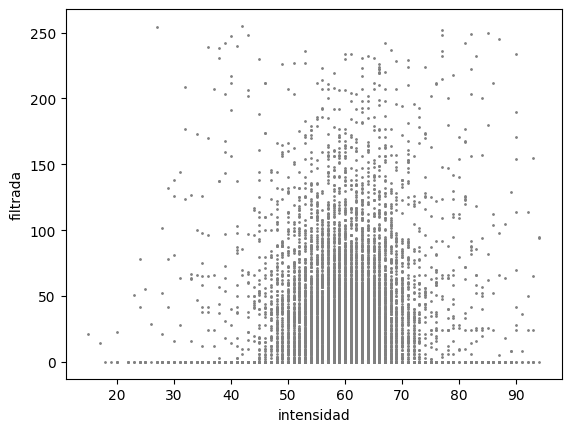

In [ ]:
variables=["intensidad","filtrada","binarizada"]

variable1=variables[0]
variable2=variables[1]

f1 = df[variable1].values
f2 = df[variable2].values

plt.scatter(f1, f2,c='gray', s=1)
plt.xlabel(variable1)
plt.ylabel(variable2)
plt.show()

matriz de varianza covarianza: 
 [[1212.06359939    7.5152039 ]
 [   7.5152039    45.25931075]] 

matriz de correlaciones: 
  [[1.         0.03208663]
 [0.03208663 1.        ]] 

correlación entra ambas variables:  0.03208662922040465 



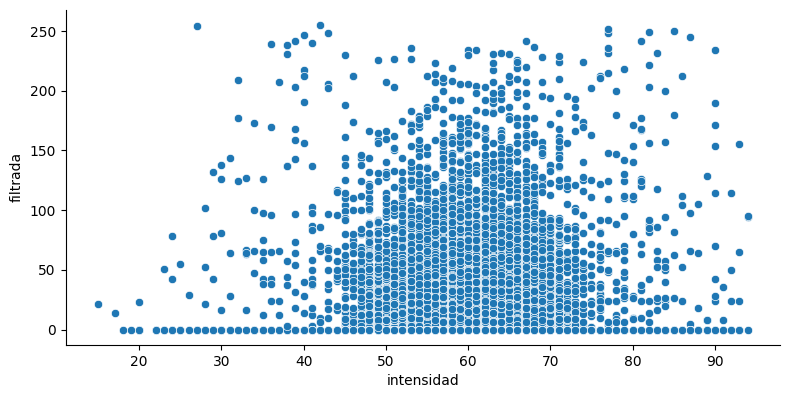

In [ ]:
#Analisis de correlacion entre las caracteristicas creadas.
#df_completo
#print(len(df_limpio))
import seaborn as sns

sns.pairplot(data=df_completo, y_vars=['filtrada'],
                 x_vars=['intensidad'],
                 aspect=2, height=4)

matcov=np.cov(df_completo.filtrada,df_completo.intensidad)
print('matriz de varianza covarianza:','\n',matcov,'\n')

corr=np.corrcoef(df_completo.filtrada,df_completo.intensidad)
print('matriz de correlaciones: \n ', corr,'\n')

print('correlación entra ambas variables: ',corr[0,1],'\n')

#Indice de correlacion bajo. Aporta informacion..

matriz de varianza covarianza: 
 [[3949.13570915   11.46745718]
 [  11.46745718   45.25931075]] 

matriz de correlaciones: 
  [[1.         0.02712452]
 [0.02712452 1.        ]] 

correlación entra ambas variables:  0.027124524280405148 



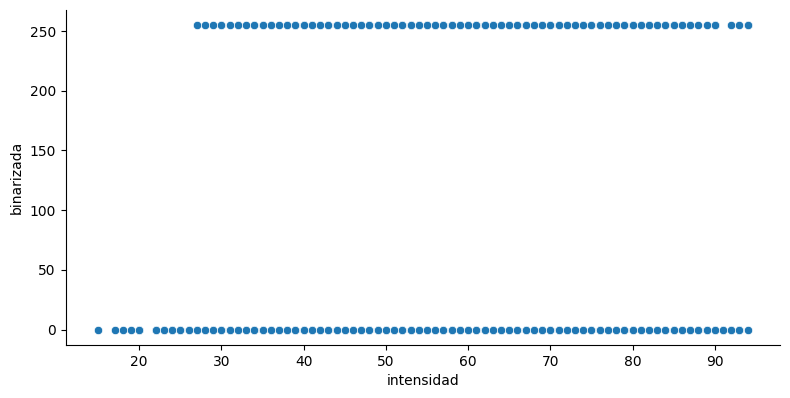

In [ ]:
sns.pairplot(data=df_completo, y_vars=['binarizada'],
                 x_vars=['intensidad'],
                 aspect=2, height=4)

matcov=np.cov(df_completo.binarizada,df_completo.intensidad)
print('matriz de varianza covarianza:','\n',matcov,'\n')

corr=np.corrcoef(df_completo.binarizada,df_completo.intensidad)
print('matriz de correlaciones: \n ', corr,'\n')

print('correlación entra ambas variables: ',corr[0,1],'\n')

#Indice de correlacion bajo. Aporta informacion..

matriz de varianza covarianza: 
 [[1212.06359939 1692.13881962]
 [1692.13881962 3949.13570915]] 

matriz de correlaciones: 
  [[1.         0.77343221]
 [0.77343221 1.        ]] 

correlación entra ambas variables:  0.773432211412088 



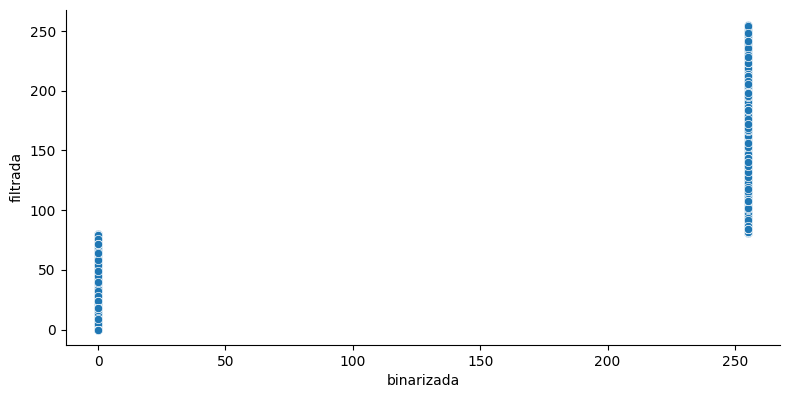

In [ ]:
sns.pairplot(data=df_completo, y_vars=['filtrada'],
                 x_vars=['binarizada'],
                 aspect=2, height=4)

matcov=np.cov(df_completo.filtrada,df_completo.binarizada)
print('matriz de varianza covarianza:','\n',matcov,'\n')

corr=np.corrcoef(df_completo.filtrada,df_completo.binarizada)
print('matriz de correlaciones: \n ', corr,'\n')

print('correlación entra ambas variables: ',corr[0,1],'\n')

#Indice alto? Aporta informacion o no? 0,76

cantidad de observaciones: 18769
cantidad de clases: 2
cantidad de variables/dimension: 3
se grafican de a dos (dimensión 2)


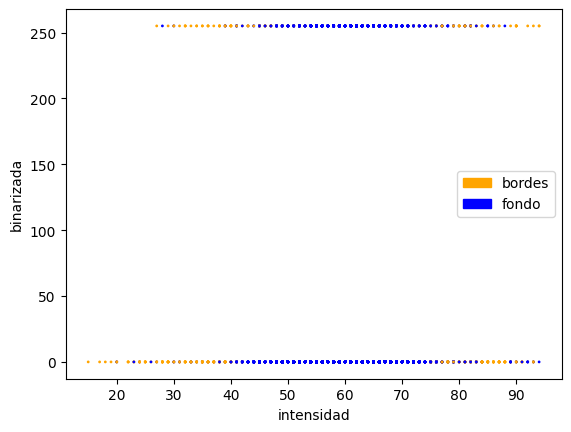

In [ ]:
import matplotlib.patches as mpatches
caracteristicas = ["intensidad","filtrada","binarizada"]
variable1= caracteristicas[0]
variable2= caracteristicas[2]
#variable2="od280/od315_of_diluted_wines"

f1 = df_completo[variable1].values
f2 = df_completo[variable2].values
f3 = df_completo['etiqueta'].values

colores=['orange','blue']
# Vamos a pintar en colores las 3 clases: naranja: 0, azul:1, rosa:2
asignar=[]
l=len(f3)
print('cantidad de observaciones:',l)
print('cantidad de clases:',2)
print('cantidad de variables/dimension:',3)
print('se grafican de a dos (dimensión 2)')

for i in range(l): #for index, row in filtered_data.iterrows():
    if(f3[i]==1):
        asignar.append(colores[0])
    elif (f3[i]==2):
        asignar.append(colores[0])
    elif (f3[i]==3):
        asignar.append(colores[0])
    elif (f3[i]==4):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
plt.scatter(f1, f2, c=asignar, s=1)
plt.xlabel(variable1)
plt.ylabel(variable2)
patch1 = mpatches.Patch(color=colores[0], label="bordes")
patch2 = mpatches.Patch(color=colores[1], label="fondo")
plt.legend(handles=[patch1,patch2])
plt.show()

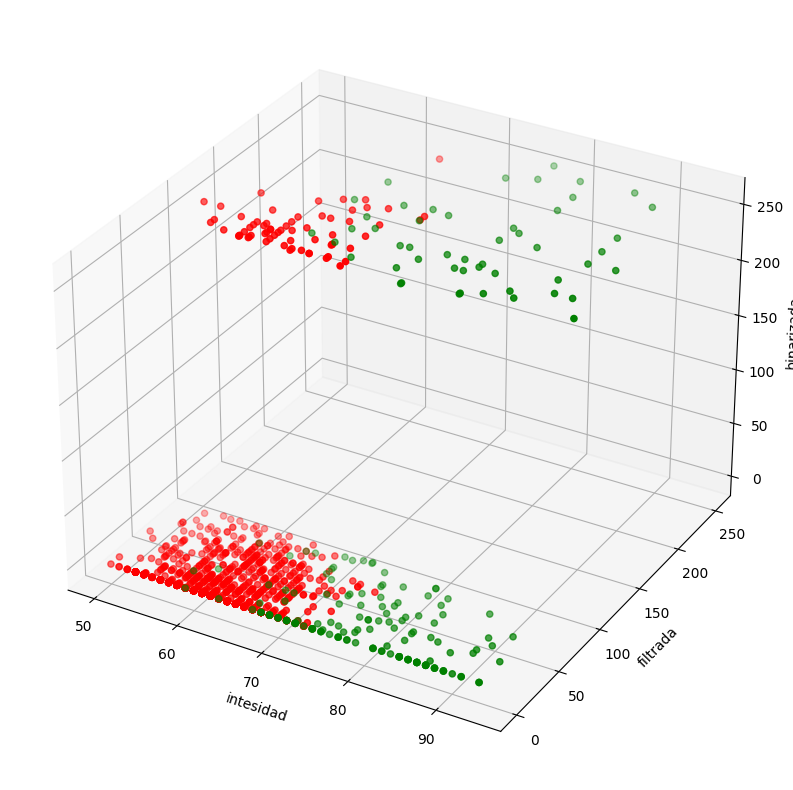

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

# Creamos la figura
fig = plt.figure(figsize=(10,10))
# Creamos el plano 3D
ax1 = fig.add_subplot(111, projection='3d')
for i in (1,2,3,4):
  x=df_completo.intensidad[df_completo.etiqueta==i]
  y=df_completo.filtrada[df_completo.etiqueta==i]
  z=df_completo.binarizada[df_completo.etiqueta==i]
for i in (0,5,6):
  x2=df_completo.intensidad[df_completo.etiqueta==i]
  y2=df_completo.filtrada[df_completo.etiqueta==i]
  z2=df_completo.binarizada[df_completo.etiqueta==i]
# Agregamos los puntos en el plano 3D
ax1.scatter(x, y, z, c='g', marker='o')
ax1.scatter(x2, y2, z2, c ='r', marker='o')
ax1.set_xlabel("intesidad")
ax1.set_ylabel("filtrada")
ax1.set_zlabel("binarizada")
# Mostramos el gráfico
plt.show()

In [ ]:
print(np.unique(f3))

[0 1 2 3 4 5 6]


##Pasamos una imagen de la BDD a DF

##Pre-procesamiento BDD

##Analisis de BDD: Histograma y segmentacion

##Asignacion de labels la BDD

##CNN:
Division de la BDD en entrenamiento, testeo y validacion
Input: Imagenes preprocesadas
Output: hay que ver los labels para entrenar el algoritmo


##Analisis de resultados: ROC, Metricas, y Matriz de confusion